# JupyLSQEGen

Notebook Licence: [https://creativecommons.org/licenses/by/4.0/](https://creativecommons.org/licenses/by/4.0/)

Pull Requests accepted: https://github.com/luketpickering/JupyNuGen (currently a little out of date WRT to this colab edition).

## Front matter

Below is a code block that installs and imports the packages that we will use and sets up some plot style defaults for the notebook

In [ ]:
%pip install vector

from math import pi
import numpy as np
import matplotlib.pyplot as plt
import vector

plt.rcParams["figure.figsize"] = (4,4)
plt.rcParams["figure.autolayout"] = True
plt.rcParams["hist.bins"] = 100
plt.rcParams["scatter.marker"] = "."

## Python Concepts Primer

If you are new to numpy or python classes, the minimal set of features that we will use are demonstrated in the collapsed cells below.

### Argument and Return Value Tuple Unpacking

A feature that I will use quite liberally in the code below is the unpacking of arguments and return values. Below we define a function that takes two numbers and returns the sum, difference, product and quotient of the two numbers and illustrates both in-place unpacking and return value unpacking.

In [ ]:
def some_numbery_things(a,b):
    return a+b, a-b, a*b, a/b

#unpack the returned tuple into named variables
mysum, mydiff, myprod, myquot = some_numbery_things(1,5)
print("some_numbery_things(1,5):", mysum, mydiff, myprod, myquot)

#you can use the placeholder, _, if you want to ignore one or more values
mysum, mydiff, _, _ = some_numbery_things(2,3)
print("some_numbery_things(2,3):", mysum, mydiff)

myargs = (2,7)
#unpack the argument tuple into positional arguments for a function call
myrv = some_numbery_things(*myargs)
print("some_numbery_things(*myargs):", myrv)

some_numbery_things(1,5): 6 -4 5 0.2
some_numbery_things(2,3): 5 -1
some_numbery_things(*myargs): (9, -5, 14, 0.2857142857142857)


These syntatic sugars generalise extremely usefully, especially when working with code that handles an arbitrary number of dimensions. If you see lots of `*myvar` in my code, don't get worried that I've reverted to writing $\tt Cpp$.

### `numpy`

`numpy` is a foundational library in the python ecosystem for working with numbers. It is especially useful for expressing mathematic operations to be performed on large sets of numbers without explicit looping in python, which is comparatively slow. It is one of the building blocks of any performant library code, and while performance will not be a strict concern of this course, it will still be a useful library to use a few core concepts from.

For the official `numpy` quickstart documentation if you'd like to learn more, go here: [https://numpy.org/doc/stable/user/quickstart.html](https://numpy.org/doc/stable/user/quickstart.html).

#### `ndarrays`, array creation, and `linspace`

`numpy` is mostly concerned with operations over arrays of numbers. The foundational class is `ndarray`, which is a multidimensional rectangular array of arbitrary dimensionality and size. We will only be using 1d arrays in this course, but most of the concepts trivially generalise.

**A note on arrays and matrices:** It is worth noting that arrays do not automatically perform matrix algebra, for that you need to explicitly use matrix methods or special operators. We will not use numpy for linear algebra in this course, so this detail is just for interest.

We can use `numpy.array` to construct ndarrays from python lists, as below.

In [ ]:
myarr = np.array([i for i in range(10)])
print(myarr)

[0 1 2 3 4 5 6 7 8 9]


We can then perform mathematical operatons on the whole list at once, and these operations are applied element-wise, side-stepping the need for explicit looping in many constructs. This will be especially useful in the construction of an event generator where many operations are *embaressingly* parallelisable. Again, performance is not a core focus of this cource, but using concepts that enable high expressivity and reduce the complexity of the code will help.

In [ ]:
myarr2 = myarr * 2
print("myarr2: %s" % myarr2)

myarrsq = myarr * myarr
print("myarrsq: %s" % myarrsq)

myarr2: [ 0  2  4  6  8 10 12 14 16 18]
myarrsq: [ 0  1  4  9 16 25 36 49 64 81]


Some python builtins are overriden for numpy arrays, but some are not. Important examples are `pow` and `sqrt`, which we need to use numpy versions of. However, if these versions are passed a python builtin scalar, they operate as expected and so code can be easily written that works either on numbers or on numpy arrays.

In [ ]:
myscalar = 5

myscalarsqrt = np.sqrt(myscalar)
print("myscalarsqrt: %s" % myscalarsqrt)

myscalarpow3 = np.power(myscalar,3)
print("myarrpow3: %s" % myscalarpow3)

myarrsqrt = np.sqrt(myarr)
print("myarrsqrt: %s" % myarrsqrt)

myarrpow3 = np.power(myarr,3)
print("myarrpow3: %s" % myarrpow3)

myscalarsqrt: 2.23606797749979
myarrpow3: 125
myarrsqrt: [0.         1.         1.41421356 1.73205081 2.         2.23606798
 2.44948974 2.64575131 2.82842712 3.        ]
myarrpow3: [  0   1   8  27  64 125 216 343 512 729]


A very useful method for creating arrays is `numpy.linspace(start, stop, N)`, this creates an array `N` long with entries linearly spaced between `start` and `stop`. Below we can see a small glimpse of the power and expressivity that numpy provides by plotting $\sin{x}$.

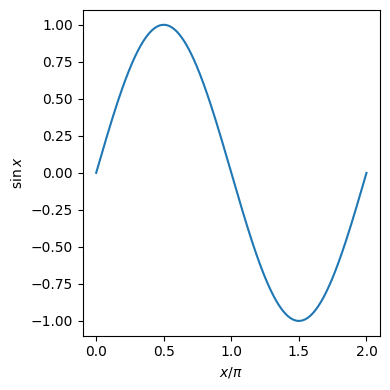

In [ ]:
xs = np.linspace(0,2*pi,1000)

plt.plot(xs / pi, np.sin(xs))
plt.ylabel(r"$\sin{x}$")
plt.xlabel(r"$x / \pi$")
plt.show()

#### Broadcasting

#### Indexing and Mask Arrays

We will not be using much advanced `numpy` indexing techniques and so I recommend consulting the official documentation if you'd like to know more about slicing and striding `numpy` `ndarray`s: [https://numpy.org/doc/stable/user/basics.indexing.html](https://numpy.org/doc/stable/user/basics.indexing.html)

We will make use of one advanced indexing technique, and that is the use of masks. Masks are boolean `ndarray`s which are used to sub-select elements to engage in assignment or computation. This can be a very useful technique when writing numpy functions that may produce some non-physical or invalid elements that you would like to avoid using in ongoing computation. Since we are not driving the computational loop over elements explicitly, we cannot use conditionals in the way that we might naively expect.

See the example below where some previous calculation produces a value for $\cos{\theta}$. We would like to calculate theta, but the range of the previous calculation is greater than the domain of $\cos$.

In [ ]:
from scipy.stats import uniform

#for this example use some random numbers as a stand-in
#  for previous calculations
costheta = uniform.rvs(0,2, 10)
np.arccos(costheta)

<ipython-input-152-bbdfab999c9f>:6: RuntimeWarning: invalid value encountered in arccos
  np.arccos(costheta)


array([       nan, 1.4830253 , 0.50915151, 1.33652497, 0.4006569 ,
              nan, 0.46462531, 0.55125802,        nan,        nan])

It is very likely that the above causes a unsightly warning messages and `nan` in the output array.

We can build a *mask* of valid values on which to operate, which avoids warnings and errors and only performs the calculations that are valid to perform.

In [ ]:
np.arccos(costheta[costheta <= 1])

array([1.4830253 , 0.50915151, 1.33652497, 0.4006569 , 0.46462531,
       0.55125802])

Often, with numpy, we want to perform concurent operations on a vector of data of fixed size. Since the return value of the masked operation is *smaller* than the input value because the operation is only performed on the subset of valid elements, this can make things fiddly. Luckily `numpy` has a solution for this, and it comes from masked assignment, as below.

In [ ]:
# construct the output array with the same shape as the input array
theta = np.zeros_like(costheta)
valid_mask = costheta <= 1
theta[valid_mask] = np.arccos(costheta[valid_mask])
print(theta)

[0.         1.4830253  0.50915151 1.33652497 0.4006569  0.
 0.46462531 0.55125802 0.         0.        ]


We can use the `~` operator to logically invert the mask, which can be useful to assign dummy or magic values to invalid elements.

In [ ]:
theta[~valid_mask] = 0xdeadbeef
print(theta)

[3.73592856e+09 1.48302530e+00 5.09151510e-01 1.33652497e+00
 4.00656899e-01 3.73592856e+09 4.64625306e-01 5.51258019e-01
 3.73592856e+09 3.73592856e+09]


**N.B.** The above is actually a bad practical example of using magic values because values of theta are likely to be used with trigonometric functions with $x\in\mathcal{R}$ support which makes it very easy to forget that you are keeping track of some invalid values in your calculation.

### Lambda Expressions/Functions

If you haven't seen python lambdas, it is worth taking a moment to understand them as we will use them extensively in the code below.

lambda functions are simply unnamed functions consisting of a single expression statement, the result of which is returned. Below, `myfunc` and `mylambdafunc` are equivalent in their usage. Both are function objects that take two arguments and return the product and quotient of them.

In [ ]:
def myfunc(x,y):
  return x*y, x/y

# N.B. the mylambdafunctuu object is not quite what you might naively think it
#  is. It is a tuple, where the first element is the lambda taking x,y and
#  returning x*y and the second element is x/y. If x/y are defined in the global
#  scope, this won't error, but it will not do what you want.
# mylambdafunctu = lambda x,y : x*y, x/y

# Because of the above, it might be advisable to not return tuples from lambdas
#   but if you must, use enclosing braces, rather than the shorthand
mylambdafunc = lambda x,y : (x*y, x/y)


print("myfunc(2,5) = ", myfunc(2,5))
print("myfunc(2,5) = ", mylambdafunc(2,5))

myfunc(2,5) =  (10, 0.4)
myfunc(2,5) =  (10, 0.4)


It sounds simple, it is simple, but if you haven't thought much about 'function objects' before, it can be a little confusing the first few times you use it. We will make extensive use of them for function 'currying'.

Function 'currying', or partial evaluation, is where you define a wrapping function that specifies one or more arguments of the wrapped function and passes through any other argument. If this is a bit abstract, hopefully the below example will help.

In [ ]:
def myfunc(x,y):
  return x*y,x/y

print("myfunc: ", myfunc(2,5))

def mycurriedfunc(x):
  return myfunc(x,5)

print("mycurriedfunc: ", mycurriedfunc(2))

myfunc:  (10, 0.4)
mycurriedfunc:  (10, 0.4)


You might wonder why this is useful. It turns out to be obscenely useful, all over the shop.

The canonical example that we will use in this course is where we have a function that calculates some physics quantity and takes both physics parameter values, which might be 'constant' in our model, and interaction kinematics, which vary event to event. If we want to integrate such a function  over only the interaction kinematics, then providing a version of the function with the parameters fixed that we can pass to a black-box integrated is very neatly achieved with function currying and lambda expressions.

We will see an illustrative example below.

In [ ]:
import scipy.integrate as spi
# x is something we might want to integrate over
# M is some parameter of the model
def myphysicsfunc(x, M):
  return np.sin(x)/M

print("Integral of myphysicsfunc with M = 10", spi.quad(lambda x: myphysicsfunc(x,10), 0, pi)[0])
print("Integral of myphysicsfunc with M = 5", spi.quad(lambda x: myphysicsfunc(x,5), 0, pi)[0])

Integral of myphysicsfunc with M = 10 0.19999999999999998
Integral of myphysicsfunc with M = 5 0.39999999999999997


So, ultimately, lambda expressions are just 'syntactic sugar', but they come in all kinds of use in the kind of 'functional-lite' programming that python makes easy!

### Python Classes

The implementation we will build is not object-oriented (OO), but we will use classes for grouping similar data together, like C structs. The only required knowledge will be how to define a class with a constructor, how to instantiate an instance of that class,  understanding the `self` parameter. We will also use some very minimal inheritance to allow us to add features to existing classes, as a result we will need to known how to define subclasses (inheritance), and call superclass (base class) methods. This basic usage is shown below.

In [ ]:
#classes in python need to 'subclass' a 'super' class. The most basic super
#  class is the builtin object type.
class Dummy(object):
    #__init__ is a magic method that is used as the constructor for the class
    #  the first parameter is an explicit handle to the instance of the class
    #  for a constructor this parameter is a brand new 'empty' class instance.
    #  convetionally this parameter is always named 'self' and it is a very
    #  good idea to stick to this convention, even if it is not enforced by
    #  the language.
    def __init__(self, val):
        #add attributes to the class through assignment, attributes set in a
        #  constructor can be considered similar to data members in OO languages
        self.myattr = val

#make an Dummy instance
mydummy1 = Dummy(1)
mydummy2 = Dummy(2)

#attributes assigned in the constructor are instance-specific
print("mydummy1.myattr = %s" % mydummy1.myattr)
print("mydummy2.myattr = %s" % mydummy2.myattr)

mydummy1.myattr = 1
mydummy2.myattr = 2


In [ ]:
#here we declare SubDummy to be a subclass of Dummy
class SubDummy(Dummy):
    def __init__(self, val):
        #pass our argument onto the superclass constructor,
        #  which we call manually
        super().__init__(val)

        #we can use attributes of the super class
        self.mysubattr = self.myattr * 2

mysubdummy1 = SubDummy(1)
print("mysubdummy1.myattr = %s, mysubdummy1.mysubattr = %s" % (mysubdummy1.myattr, mysubdummy1.mysubattr))

mysubdummy1.myattr = 1, mysubdummy1.mysubattr = 2


Thats all of the python OO that we will be relying on for this course!

## 1: Implementing the Differential Cross Section for the CCQE Reaction

The first step of building a generator is working out what model to implement. We aren't writing a model here, we're just trying to build a generator, so lets base it upon a relatively simple model of a relatively simple interaction.

We will implement the Llewellyn Smith CCQE model from the seminal paper [*Neutrino Reactions at Accelerator Energies.*](https://www.sciencedirect.com/science/article/pii/0370157372900105).

Starting on page 300 (page 40 of the document), $\S$ 3.3 Quasi-Elastic Neutrino Scattering ($\Delta Y = 0$). Our first goal is to implement the differential cross section, $d\sigma/d\left|q^2\right|$ (page 301 eqn. 3.18).

Throughout, we will use the very common $Q^2 = -q^2$ to avoid carrying around needless minus signs due to our choice of metric. Internally some functions still use $q^2$, rather than $Q^2$, but we will make all interfaces take positive parameters for simplicity and consistency.

It is useful to define some constants and units that we will use throughout the model implementation. If you were building a real generator, it is a good idea to use a proper complete system of units, but for this, it will be okay to just define the ones that we will use.

In [ ]:
# Constants
## Units
fm = 5.068 # GeV^-1
cm2 = fm * fm * 1E26 # GeV^-2
pb = 1E-36 * cm2

## Physical Constants
GF = 1.1663787e-5  # Fermi coupling constant in GeV^-2
cos_theta_C = 0.97425  # Cosine of the Cabibbo angle
eta = 3.71

## Particle Masses
m_p = 0.938272  # Proton mass in GeV/c^2
m_n = 0.939565  # Neutron mass in GeV/c^2
m_mu = 0.105658  # Muon mass in GeV/c^2
m_e = 0.000511  # electron mass in GeV/c^2
m_pi = 0.1396  # pion mass in GeV/c^2

## Model Parameters
M_A_GeV = 1.03
M_V_GeV = 0.73
g_A = -1.23

### 1.1: Nucleon Form Factors

We need to be able to calculate the weak nucleon form factors, which are functions of the four-momentum transfer squared, $q^2$.
At the time the Llewellyn Smith reference was written our knowledge of the weak form factors was poor and so the sophisticated data-driven parameterisations that we often see today were not available. Here, that works in our favor, as we can use simple implementations for both the vector and axial form factors.

#### 1.1.1: Some Useful Pre-calculations

Some terms appear in the following model implementation more than once, as a
result it is worth pre-calculating them and passing them around in a blob
rather than recalculating each time and having many function arguments to
keep track of.

In [ ]:
class LSQEPreCalc(object):
    def __init__(self, Q2_GeV2, nupid):

        if abs(nupid) == 12:
            self.nuflv = 1
        elif abs(nupid) == 14:
            self.nuflv = 2
        else:
            raise RuntimeError("invalid nupid: %s passed to LSQEPreCalc" % nupid)

        self.nuornub = 1 if nupid > 0 else -1

        self.MNuc = m_n if self.nuornub == 1 else m_p
        self.mlep = m_e if self.nuflv == 1 else m_mu

        self.MNuc2 = self.MNuc * self.MNuc
        self.mlep2 = self.mlep * self.mlep

        self.m2_M2 = self.mlep2/self.MNuc2

        self.q2 = np.array(-Q2_GeV2)
        self.q2_M2 = self.q2/self.MNuc2

##### Example Usage

In [ ]:
#use like

Q2 = 1.0 # in GeV2
nupid = 14 # muon neutrino
lspc = LSQEPreCalc(1.0, 14)
print(lspc.q2_M2)

#also works with numpy vectorisation
lspc = LSQEPreCalc(np.linspace(0, 1, 10), 14)
print(lspc.q2_M2)

-1.1327819995116872
[-0.         -0.12586467 -0.25172933 -0.377594   -0.50345867 -0.62932333
 -0.755188   -0.88105267 -1.00691733 -1.132782  ]


#### 1.1.2: EM/Vector

In [ ]:
# p301 eqn 3.17 (left)
def GV_E(lspc, M_V):
    return 1.0 / np.power(1.0 - lspc.q2/M_V,2)

# p301 eqn 3.17 (right)
def GV_M(lspc, M_V):
    return (1.0 + eta) / np.power(1.0 - lspc.q2/M_V,2)

# p301 eqn 3.16 (top)
def F1_V_Sachs(lspc, M_V):
    return (GV_E(lspc,M_V) - 0.25 * lspc.q2_M2*GV_M(lspc,M_V))/(1.0 - 0.25 * lspc.q2_M2)

# p301 eqn 3.16 (bottom)
def etaF2_V_Sachs(lspc, M_V):
    return (GV_M(lspc,M_V) - GV_E(lspc,M_V))/(1.0 - 0.25 * lspc.q2_M2)

#### 1.1.3: Axial

In [ ]:
# p303 eqn 3.24
def dipole_FA(q2_GeV2, M_A):
    return g_A / np.power((1 - (q2_GeV2/(M_A*M_A))),2)

#### 1.1.4: Form Factor Blob

Now that we have written down the form factors, it is also worth lumping them
together in a class. We can simply extend our previous class to give the
implementation access to all of our pre-calculated values in one go.

In [ ]:
class LSQEFFBlob(LSQEPreCalc):
    def __init__(self, Q2_GeV2, nupid, M_V=M_V_GeV, M_A=M_A_GeV):

        # call the LSQEPreCalc constructor
        super().__init__(Q2_GeV2, nupid)

        self.F1_V = F1_V_Sachs(self,M_V)
        self.F1_V2 = self.F1_V * self.F1_V
        self.etaF2_V = etaF2_V_Sachs(self,M_V)
        self.etaF2_V2 = self.etaF2_V * self.etaF2_V
        self.F3_V = 0
        self.F3_V2 = self.F3_V * self.F3_V

        self.F_A = dipole_FA(self.q2, M_A)
        self.F_A2 = self.F_A * self.F_A
        self.F3_A = 0
        self.F3_A2 = self.F3_A * self.F3_A

        # p305, unnumbered
        self.F_P = (2 * self.MNuc2 * self.F_A) / (m_pi*m_pi - self.q2)
        self.F_P2 = self.F_P*self.F_P

##### Example Usage

In [ ]:
Q2 = 1.0 # in GeV2
nupid = 14 # muon neutrino
lsff = LSQEFFBlob(1.0, 14)

#also works with numpy vectorisation
Q2s = np.linspace(0, 1, 100)
lsff = LSQEFFBlob(Q2s, 14)

#### Question 1

Can you plot the axial form factor as a function of $Q^2$? How does it change with varying $M_A$? Is the change just to the normalisation, or to the shape as well?

Hint: You can integrate a function over evenly-spaced points like:

```python
from scipy import integrate as spi
x = np.linspace(0,1,100)
spi.simpson(f(x), x=x)
```

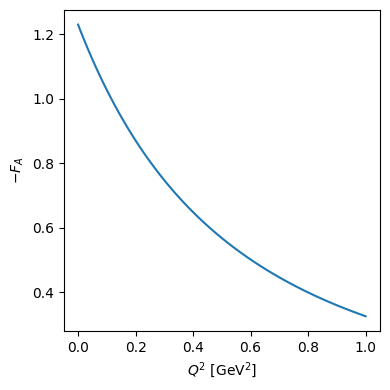

In [ ]:
# Answer Q1 in here

Q2s = np.linspace(0, 1, 100)

plt.plot(Q2s, -LSQEFFBlob(Q2s, 14).F_A)
plt.ylabel(r"$-F_A$")
plt.xlabel(r"$Q^2$ [GeV$^2$]")
plt.show()


### now your bit

##### Model Answer:

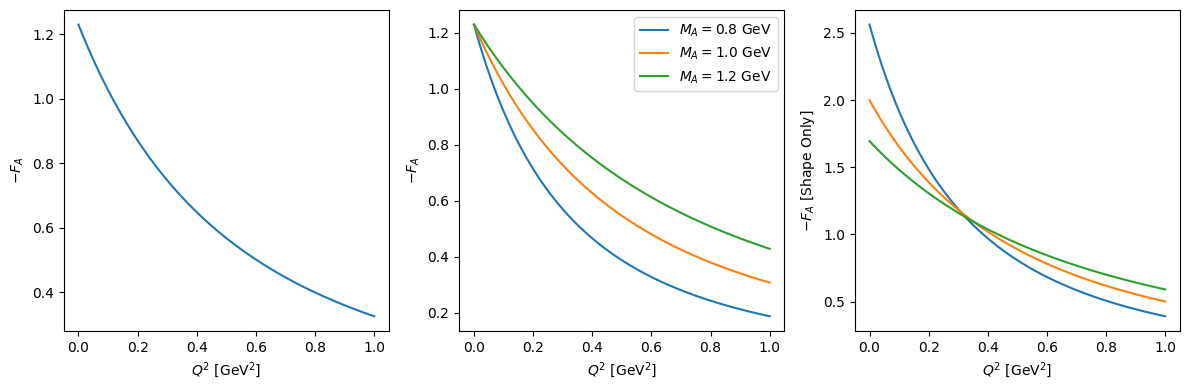

In [ ]:
from scipy import integrate as spi

Q2s = np.linspace(0, 1, 100)

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(12,4))

ax1.plot(Q2s, -LSQEFFBlob(Q2s, 14).F_A)
ax1.set_ylabel(r"$-F_A$")
ax1.set_xlabel(r"$Q^2$ [GeV$^2$]")

ax2.plot(Q2s, -LSQEFFBlob(Q2s, 14, M_A=0.8).F_A, label=r"$M_A = 0.8$ GeV")
ax2.plot(Q2s, -LSQEFFBlob(Q2s, 14, M_A=1).F_A, label=r"$M_A = 1.0$ GeV")
ax2.plot(Q2s, -LSQEFFBlob(Q2s, 14, M_A=1.2).F_A, label=r"$M_A = 1.2$ GeV")
ax2.set_ylabel(r"$-F_A$")
ax2.set_xlabel(r"$Q^2$ [GeV$^2$]")
ax2.legend()

ax3.plot(Q2s, -LSQEFFBlob(Q2s, 14, M_A=0.8).F_A/(spi.simpson(-LSQEFFBlob(Q2s, 14, M_A=0.8).F_A, x=Q2s)), label=r"$M_A = 0.8$ GeV")
ax3.plot(Q2s, -LSQEFFBlob(Q2s, 14, M_A=1).F_A/(spi.simpson(-LSQEFFBlob(Q2s, 14, M_A=1).F_A, x=Q2s)), label=r"$M_A = 1.0$ GeV")
ax3.plot(Q2s, -LSQEFFBlob(Q2s, 14, M_A=1.2).F_A/(spi.simpson(-LSQEFFBlob(Q2s, 14, M_A=1.2).F_A, x=Q2s)), label=r"$M_A = 1.2$ GeV")
ax3.set_ylabel(r"$-F_A$ [Shape Only]")
ax3.set_xlabel(r"$Q^2$ [GeV$^2$]")

fig.show()

### 1.2 The Differential Cross Section: $d\sigma/dQ^2$

Now we have all the precalculations ready to implement the A, B, and C components of the differential cross section. This is just a lot of maths to encode, even for this relatively simple model. Implementing big blobs of maths is quite error prone, double check your (and my) working!

In [ ]:
#A, B, and C are all implemented from p302 eqn 3.22

def A(lsff):
    t1 = (4 - lsff.q2_M2)*lsff.F_A2
    t2 = (4 + lsff.q2_M2)*lsff.F1_V2
    t3 = lsff.q2_M2 * lsff.etaF2_V2*(1 + 0.25*lsff.q2_M2)
    t4 = 4*lsff.q2_M2*lsff.F1_V*lsff.etaF2_V
    t5 = lsff.q2_M2 * (4 - lsff.q2_M2) * lsff.F3_A2
    t6 = lsff.m2_M2 * ( np.power(lsff.F1_V + lsff.etaF2_V,2)
                  + np.power(lsff.F_A + 2*lsff.F_P,2)
                  + (lsff.q2_M2 - 4)*(lsff.F3_V2 + lsff.F_P2) )

    return (0.25*(lsff.mlep2 - lsff.q2)/lsff.MNuc2)*(t1 - t2 - t3 - t4 + t5 - t6)

def B(lsff):
    t1 = -lsff.q2_M2 * lsff.F_A * (lsff.F1_V + lsff.etaF2_V)
    t2 = lsff.m2_M2 * ( (lsff.F1_V + 0.25*lsff.q2_M2*lsff.etaF2_V)*lsff.F3_V
                    - (lsff.F_A + 0.5*lsff.F_P*lsff.q2_M2) * lsff.F3_A )
    return t1 - t2

def C(lsff):
    t1 = lsff.F_A2
    t2 = lsff.F1_V2
    t3 = lsff.q2_M2 * 0.25 * lsff.etaF2_V2
    t4 = lsff.q2_M2 * lsff.F3_A2
    return 0.25 * ( t1 + t2 - t3 - t4 )

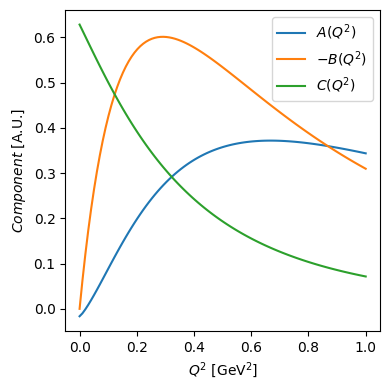

In [ ]:
Q2s = np.linspace(0, 1, 100)
lsff = LSQEFFBlob(Q2s, 14)
plt.plot(Q2s, A(lsff), label=r"$A(Q^2)$")
plt.plot(Q2s, -B(lsff), label=r"$-B(Q^2)$")
plt.plot(Q2s, C(lsff), label=r"$C(Q^2)$")
plt.ylabel(r"$Component$ [A.U.]")
plt.xlabel(r"$Q^2$ [GeV$^2$]")
plt.legend()
plt.show()

Now we are ready to encode the full differential cross section calculation!

In [ ]:
#p301 eqn 3.18
def LSQEDSigmaDQ2(E_nu_GeV, Q2_GeV2, nupid, M_V=M_V_GeV, M_A=M_A_GeV):
    enu = np.array(E_nu_GeV)

    lsff = LSQEFFBlob(Q2_GeV2, nupid, M_V=M_V, M_A=M_A)

    smu = np.zeros_like(enu + lsff.q2)
    dsdQ2 = np.zeros_like(enu + lsff.q2)

    enu_nonzero = enu > 0

    smu[enu_nonzero] = 4 * lsff.MNuc2 * enu[enu_nonzero] + lsff.q2[enu_nonzero] - lsff.mlep2

    dsdQ2[enu_nonzero] = (lsff.MNuc2 * GF * GF * np.power(cos_theta_C,2))/(8*pi*np.power(enu[enu_nonzero],2)) \
            * ( A(lsff)[enu_nonzero]
                + -1 * lsff.nuornub * B(lsff)[enu_nonzero] * smu[enu_nonzero] / lsff.MNuc2
                + C(lsff)[enu_nonzero] * np.power(smu[enu_nonzero],2) / np.power(lsff.MNuc2,2)
              )
    return dsdQ2

#### 1.2.1 A Short Aside on Units
Around the literature you will often see neutrino cross sections reported in $10^{-38}$ cm$^2$. There are two reasons why I disagree with this convention and will choose this hill to die on.

1) Carrying around an exponent of $10^{-38}$ is needless and silly when we have scale prefixes.
2) If you want your result in cm$^2$ and multiply the $10^{-38}$ into your cross section value and then store your answer in a single precision floating point variable (`float`), then you're so close to IEEE 754 single precision float min (1.18 $10^{-38}$) that if you aren't very careful, computer maths will appear to stop working.

We're going to work in picobarns = $10^{-36}$ cm$^2$.

In [ ]:
def LSQEDSigmaDQ2_pb(E_nu_GeV, Q2_GeV2, nupid, M_V=M_V_GeV, M_A=M_A_GeV):
    return LSQEDSigmaDQ2(E_nu_GeV, Q2_GeV2, nupid, M_V=M_V, M_A=M_A) / pb

#### Question 2

Can you plot the differential cross section for a few different neutrino energies in the few GeV region for neutrinos and antineutrinos?

Notice anything odd?

In [ ]:
# Answer Q2 here

##### Model Answer

It looks a bit odd that the cross section seems to *rise* with $Q^2$ for antineutrinos at $E_{\nu} = 0.5$ GeV above about $Q^2 \simeq 0.5$.

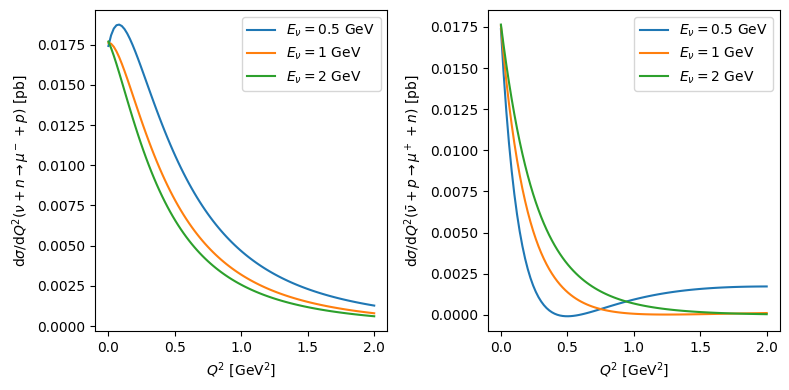

In [ ]:
enu0_5 = 0.5 #GeV
enu1 = 1 #GeV
enu2 = 2 #GeV
Q2s = np.linspace(0, 2, 100)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(8,4))

ax1.plot(Q2s, LSQEDSigmaDQ2_pb(enu0_5, Q2s, 14), label=r"$E_\nu = 0.5$ GeV")
ax1.plot(Q2s, LSQEDSigmaDQ2_pb(enu1, Q2s, 14), label=r"$E_\nu = 1$ GeV")
ax1.plot(Q2s, LSQEDSigmaDQ2_pb(enu2, Q2s, 14), label=r"$E_\nu = 2$ GeV")
ax1.set_ylabel(r"d$\sigma$/d$Q^{2} (\nu + n \rightarrow \mu^- + p)$ [pb]")
ax1.set_xlabel(r"$Q^{2}$ [GeV$^{2}$]")
ax1.legend()

ax2.plot(Q2s, LSQEDSigmaDQ2_pb(enu0_5, Q2s, -14), label=r"$E_\nu = 0.5$ GeV")
ax2.plot(Q2s, LSQEDSigmaDQ2_pb(enu1, Q2s, -14), label=r"$E_\nu = 1$ GeV")
ax2.plot(Q2s, LSQEDSigmaDQ2_pb(enu2, Q2s, -14), label=r"$E_\nu = 2$ GeV")
ax2.set_ylabel(r"d$\sigma$/d$Q^{2} (\bar{\nu} + p \rightarrow \mu^+ + n)$ [pb]")
ax2.set_xlabel(r"$Q^{2}$ [GeV$^{2}$]")
ax2.legend()

fig.show()

## 2: Kinematics Calculation

So now we can calculate $d\sigma/dQ^2|_{E_\nu}(Q^2)$, but $Q^2$
is not observable, so it is not an appropriate quantity to build
an event generator around. Lets see if we can calculate the
physical observables.

Consider the interaction:

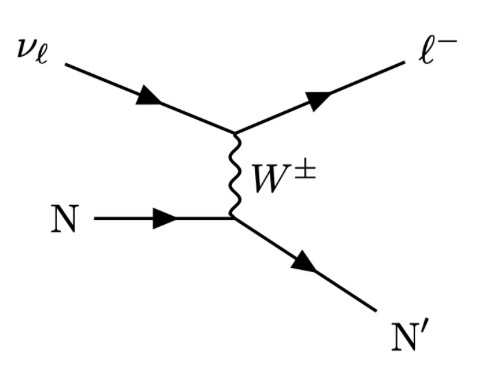
<div>

Choose coordinates such that: <br>
$\vec{p}_\nu = \vec{p}_{\nu,z} = E_\nu$ <br>
$\vec{p}_N = 0$ <br>
$\vec{p}_{\ell,y} = \vec{p}_{{N^\prime},y} = 0$ <br>

In general, this choice may require a boost into the target nucleon rest frame
and rotation, but should always be possible. The problem becomes 2D and we are
left with 4 unknowns: $p_\ell$, $\cos{\theta_\ell}$, $p_{N^\prime}$, and
$\cos{\theta_{N^\prime}}$. These can be uniquely determined by enforcing energy
conservation, momentum conservation along two axes, and the $Q^2$ that we take
as input.

**Energy conservation**: $E_\nu + E_N = E_\ell + E_{N^\prime}$ <br/>
Initial nucleon $N$ at rest: $E_N = M_N$, $\vec{p}_N = 0$ <br>
[1] $E_\nu + M_N = E_\ell + E_{N^\prime}$ <br/>

**Linear momentum along $\hat{z}$**: <br>
[2] $E_\nu = p_\mu \cos{\theta_\ell} + p_{N^\prime} \cos{\theta_{N^\prime}}$ <br>

**Linear momentum along $\hat{x}$**: <br>
[3] $p_\mu \sin{\theta_\ell} = p_{N^\prime} \sin{\theta_{N^\prime}}$ <br>

From [2]$^2+$[3]$^2$: $(E_\nu - p_\ell\cos{\theta_\ell})^2 + p_\ell\sin{\theta_\ell}^2 = p_{N^\prime}^2(\cos{\theta_{N^\prime}}^2 + \sin{\theta_{N^\prime}}^2)$ <br>
$\rightarrow E_\nu^2 - 2E_\nu p_\ell\cos{\theta_\ell} + p_\ell^2(\cos{\theta_\ell}^2 + \sin{\theta_\ell}) = p_{N^\prime}^2$ <br>
[4] $\cos{\theta_\ell} = (E_\nu^2 + p_\ell^2 - p_{N^\prime}^2)/(2E_\nu p_\ell)$ <br><br>

$Q^2 = -q^2 = q_3^2 - q_0^2$
We know $\vec{p}_N = 0 \rightarrow \vec{p}_{N^\prime} = \vec{q}_3$ and so: <br>
[5] $Q^2 = p_{N^\prime}^2 - q_0^2$

From [1]: $E_{N^\prime} = E_\nu - E_\ell + M_N = q_0 + M_N$ <br/>
[6] $q_0 = E_{N^\prime} - M_N$ <br>
Squaring [6] and substituting $E_{N^\prime}^2 = p_{N^\prime}^2 + M_{N^\prime}^2$ <br>
[7] $q_0^2 + M_N^2 + 2M_Nq_0 = p_{N^\prime}^2 + M_{N^\prime}^2$ <br>
Including [5] and rearranging: <br>
[8] $q_0 = (Q^2 - (M_N^2 - M_{N^\prime}^2))/2M_N$

So now we can uniquely find $q_0$ from a chosen $Q^2$. Often at this stage,
the $(M_N^2 - M_{N^\prime}^2)/2M_N$ term is neglected as neglible, but for
reasons that will become clearer later, we retain it. We can calculate the
final state lepton energy from the definition of $q_0 = E_\nu - E_\ell$,
which lets us calculate $p_\ell$.

Using [5]: $p_{N^\prime} = \sqrt{Q^2 + q_0^2}$ <br>

We can then use [4] to find $\cos{\theta_\ell}$ and [2] to find
$\cos{\theta_{N^\prime}}$, thus fully specifying the kinematics of the
interaction.

### 2.1: KinematicsBlob

We will wrap these calculations into a class, similar to what we did for the form factor calculations. This class will form a key part of the final event generator. As noted in the derivation, it will become useful later to allow $M_{N^\prime}$ to vary, so we will define a parameter that allows us to set it externally. If it is not set, it will use the rest mass of the relevant target nucleon by default.

There are two energetic limits that we have to take care of if we don't want lots of red error messages about `sqrt`ing negatives or dividing by zero, $q_0 >= 0$ and $E_\nu >= (q0 + m_\ell)$. The details require a bit of `numpy` care to express everything without explicitly looping over inputs in python, but the basic idea is to only perform the kinematic calculations on energetically allowed combinations of $E_\nu$, $Q^2$, $M_N$, and $M_{N^\prime}$ by using numpy mask arrays as described in the primer.

For ease of debugging we add a magic `__str__` method to the class which enables instances of our class to be converted to strings.

In [ ]:
class KinematicsBlob(object):
    def __init__(self, E_nu_GeV, Q2_GeV2, nupid, MNtgt=None):
        #use the default on-shell mass if unspecified
        if MNtgt == None:
            MNtgt = m_n if nupid > 0 else m_p
        MNpr = m_p if nupid > 0 else m_n

        if abs(nupid) == 12:
            mlep = m_e
        elif abs(nupid) == 14:
            mlep = m_mu
        else:
            raise RuntimeError("invalid nupid: %s passed to KinematicsBlob" % nupid)

        #enu and Q2 but with the shape of np.broadcast(enu, Q2)
        enu = E_nu_GeV + np.zeros_like(Q2_GeV2)
        Q2 = Q2_GeV2 + np.zeros_like(E_nu_GeV)

        # From [8] above
        q0 = (Q2 - (np.power(MNtgt,2) - np.power(MNpr,2)))/(2*MNtgt)

        # If elep is less than the rest mass,
        # or if the four-momentum transfer is ,
        # less than the change in nucleon mass,
        # the reaction is energetically disallowed
        # build a numpy mask array to mask out
        # invalid values from later calculations
        self.energetically_allowed = ~np.logical_or(q0 < 0, (enu - q0) < mlep)

        #we restrict the rest of the calculation to only the subset of
        #  allowed values.
        enuv = np.atleast_1d(enu)[self.energetically_allowed]
        Q2v = np.atleast_1d(Q2)[self.energetically_allowed]
        q0v = np.atleast_1d(q0)[self.energetically_allowed]

        elepv = enuv - q0v
        plepv = np.sqrt(np.power(elepv,2) - np.power(mlep,2))
        pnucv = np.sqrt(Q2v + np.power(q0v,2))

        # From [4] above
        lepctv = (np.power(enuv,2) + np.power(plepv,2) - np.power(pnucv,2))/(2*enuv*plepv)
        # From [2] above
        nucctv = (enuv - plepv * lepctv)/pnucv

        self.MN = MNtgt
        self.MNpr = MNpr
        self.mlep = mlep

        self.enu = E_nu_GeV
        self.Q2 = Q2_GeV2
        self.q0 = q0

        #as we used masked assignment below, these cannot be allowed to
        #  decay to scalars
        self.plep = np.atleast_1d(np.zeros_like(enu))
        self.pnuc = np.atleast_1d(np.zeros_like(enu))
        self.lepct = np.atleast_1d(np.zeros_like(enu))
        self.nucct = np.atleast_1d(np.zeros_like(enu))

        self.plep[self.energetically_allowed] = plepv
        self.pnuc[self.energetically_allowed] = pnucv
        self.lepct[self.energetically_allowed] = lepctv
        self.nucct[self.energetically_allowed] = nucctv

    def __str__(self):
        if isinstance(self.plep, np.ndarray):
            return f"[\n  enu = {self.enu},\n  Q2 = {self.Q2},\n  q0 = {self.q0},\n  plep = {self.plep},\n  lepct = {self.lepct}\n]"
        return f"[ Q2 = {self.Q2}, q0 = {self.q0:.2}, plep = {self.plep:.2}, lepct = {self.lepct:.2} ]"

##### Example Usage

In [ ]:
# works with numbers
print(KinematicsBlob(1, 1, 12))
# numpy inputs for Q2
print(KinematicsBlob(1,np.linspace(0.1,0.5,5), 12))
# numpy inputs for Enu
print(KinematicsBlob(np.linspace(0.8,1.2,5), 1, 12))
# numpy inputs for both!
print(KinematicsBlob(np.linspace(0.8,1.2,5), np.linspace(0.1,0.5,5), 12))

[
  enu = 1,
  Q2 = 1,
  q0 = 0.5308690493787018,
  plep = [0],
  lepct = [0]
]
[
  enu = 1,
  Q2 = [0.1 0.2 0.3 0.4 0.5],
  q0 = [0.05192401 0.10514012 0.15835624 0.21157235 0.26478847],
  plep = [0.94807586 0.89485973 0.84164361 0.78842748 0.73521135],
  lepct = [0.94726161 0.88825066 0.82177732 0.74633055 0.65996179]
]
[
  enu = [0.8 0.9 1.  1.1 1.2],
  Q2 = 1,
  q0 = [0.53086905 0.53086905 0.53086905 0.53086905 0.53086905],
  plep = [0.26913047 0.3691306  0.46913067 0.56913072 0.66913076],
  lepct = [-1.32229256 -0.50503738 -0.06580081  0.20133402  0.37730171]
]
[
  enu = [0.8 0.9 1.  1.1 1.2],
  Q2 = [0.1 0.2 0.3 0.4 0.5],
  q0 = [0.05192401 0.10514012 0.15835624 0.21157235 0.26478847],
  plep = [0.74807582 0.79485971 0.84164361 0.8884275  0.93521139],
  lepct = [0.91645233 0.86021295 0.82177732 0.79534835 0.777234  ]
]


#### Question 3

Look at how the final state kinematics vary as a function of $Q^2$. Can you find something the looks like a kinematic limit? Can $Q^2$ be larger than $E_\nu$?

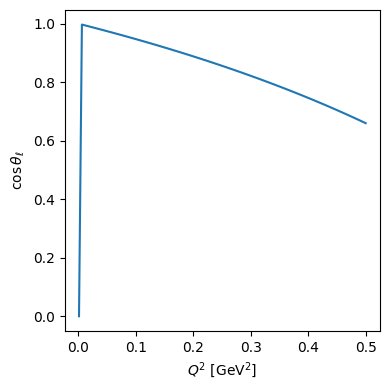

In [ ]:
# Answer Q3 here
enu = 1
Q2s = np.linspace(1E-3,0.5,100)
plt.plot(Q2s, KinematicsBlob(1, Q2s, 12).lepct)
plt.ylabel(r"$\cos{\theta_\ell}$")
plt.xlabel(r"$Q^2$ [GeV$^2$]")
plt.show()

##### Model Answer

At some $Q^2 > Q^2_\text{max}$, momentum cannot be conserved as [4] would imply
$\cos{\theta_\ell} < -1$.

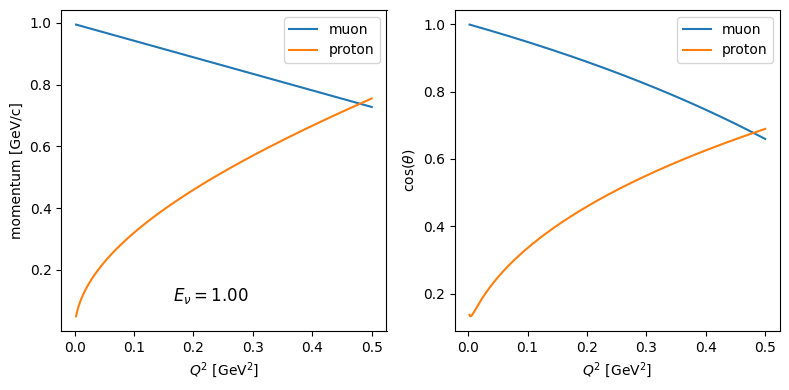

In [ ]:
def plotkins(enu, Q2max):

    kb = KinematicsBlob(enu, np.linspace(0,Q2max,1000), 14)

    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(8,4))

    ax1.plot(kb.Q2[kb.energetically_allowed], kb.plep[kb.energetically_allowed],label="muon")
    ax1.plot(kb.Q2[kb.energetically_allowed], kb.pnuc[kb.energetically_allowed],label="proton")
    ax1.set_ylabel("momentum [GeV/c]")
    ax1.set_xlabel(r"$Q^2$ [GeV$^2$]")
    ax1.legend()
    ax1.text(0.33*Q2max, 0.1, r"$E_\nu = $" + "%.2f" % enu, size="large")

    ax2.plot(kb.Q2[kb.energetically_allowed], kb.lepct[kb.energetically_allowed],label="muon")
    ax2.plot(kb.Q2[kb.energetically_allowed], kb.nucct[kb.energetically_allowed],label="proton")
    ax2.set_ylabel(r"$\cos(\theta)$")
    ax2.set_xlabel(r"$Q^2$ [GeV$^2$]")
    ax2.legend()

    fig.show()

enu = 1
Q2Max = 0.5
plotkins(enu, Q2Max)

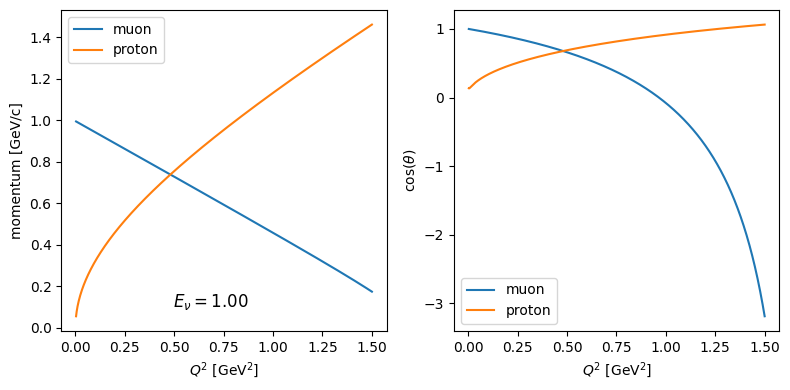

In [ ]:
enu = 1
Q2Max = 1.5
plotkins(enu, Q2Max)

### 2.2: Kinematic Limits

For this simple interaction, we can actually analytically solve the allowed $Q^2$ range for a given $E_\nu$. The detailed algebra-crunching can be found [in the supplementary material](#Kinematic-Limits-in-$Q^2$). Below we define a function that returns the upper and lower bounds of kinematically and energetically allowed $Q^2$ for a given $E_\nu$, neutrino species, and target nucleon mass.

In [ ]:
def KinematicQ2Constraints(E_nu_GeV, nupid, MNtgt=None):

    #This allows us to specify an off-shell mass
    #  for the target nucleon for kinematics calculation
    if MNtgt == None:
        MNtgt = m_n if nupid > 0 else m_p

    MNpr = m_p if nupid > 0 else m_n

    if abs(nupid) == 12:
        mlep = m_e
    elif abs(nupid) == 14:
        mlep = m_mu
    else:
        raise RuntimeError("invalid nupid: %s passed to KinematicsBlob" % nupid)

    enu = np.array(E_nu_GeV)

    DM2 = (np.power(MNtgt,2) - np.power(MNpr,2))

    enu_MN = enu/MNtgt
    mlep2 = np.power(mlep,2)

    a = 1 + 2 * enu_MN
    mb = 2 * (2 * np.power(enu,2) - (1 + enu_MN)*mlep2 + enu_MN * DM2)
    c = np.power(mlep,4) - 2 * mlep2 * DM2 * enu_MN

    # if the discriminant is <= 0 then there is no allowed Q2 phase space for this E_nu
    disc = np.power(mb,2) - 4 * a * c
    vmask = disc > 0

    low_lim = np.zeros_like(disc)
    up_lim = np.zeros_like(disc)

    up_lim[vmask] = (mb[vmask] + np.sqrt(disc[vmask]))/(2*a[vmask])
    low_lim[vmask] = (mb[vmask] - np.sqrt(disc[vmask]))/(2*a[vmask])

    ## Energetic constraint: ELep >= mlep. From [8] with q0_min = 0
    Q2_min_energetic = (np.power(MNtgt,2) - np.power(MNpr,2))

    ## If the kinematic constraint is less stringent than the energetic one, use that
    low_lim[vmask] = np.where(low_lim[vmask] < Q2_min_energetic,
                              Q2_min_energetic,
                              low_lim[vmask])

    # We squeeze this so that if we pass a single number, we get a 1D array with the two limits
    #  out, rather than a 2x1 2D array.
    return np.vstack((low_lim, up_lim)).squeeze()

##### Example Usage

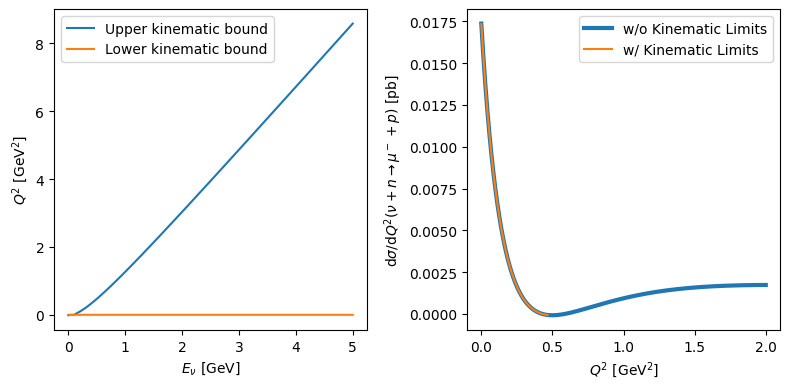

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(8,4))

enus = np.linspace(0,5,100)
ax1.plot(enus, KinematicQ2Constraints(enus, 14)[1], label="Upper kinematic bound")
ax1.plot(enus, KinematicQ2Constraints(enus, 14)[0], label="Lower kinematic bound")
ax1.set_ylabel(r"$Q^2$ [GeV$^2$]")
ax1.set_xlabel(r"$E_\nu$ [GeV]")
ax1.legend()

enu = 0.5
Q2s = np.linspace(0, 2, 1000)
Q2s_allowed = np.linspace(*KinematicQ2Constraints(enu, -14), 1000)

ax2.plot(Q2s, LSQEDSigmaDQ2_pb(enu, Q2s, -14), label=r"w/o Kinematic Limits", lw=3)
ax2.plot(Q2s_allowed, LSQEDSigmaDQ2_pb(enu, Q2s_allowed, -14), label=r"w/ Kinematic Limits")
ax2.set_ylabel(r"d$\sigma$/d$Q^{2} (\nu + n \rightarrow \mu^- + p)$ [pb]")
ax2.set_xlabel(r"$Q^{2}$ [GeV$^{2}$]")
ax2.legend()

fig.show()

#### 2.2.1: Aside on Floating Point Precision

Lets check that these analytic $Q^2$ limits actually work:

In [ ]:
enu = 1
Q2s_allowed = np.linspace(*KinematicQ2Constraints(enu, 14), 5)
kb = KinematicsBlob(enu, Q2s_allowed, 14)
print("enu:", kb.enu)
print("Q2:", kb.Q2)
print("lepct:", kb.lepct)
print("energetically_allowed:", kb.energetically_allowed)
print("physical:", np.abs(kb.lepct) <= 1)

enu: 1
Q2: [0.00242804 0.31817407 0.6339201  0.94966613 1.26541216]
lepct: [ 0.9987949   0.80862144  0.52084087  0.03199347 -1.        ]
energetically_allowed: [ True  True  True  True  True]
physical: [ True  True  True  True False]


You might notice from the above printout that the last $Q^2$ test point within the calculated range apparently fails the kinematic check. This might seem strange given that the kinematic limit was what motivated our $Q^2$ allowed region. Looking closer at the output, you can see that `leptct` is apparently exactly at the limit. This suggests that the problem is one of floating point precision. Exact floating point comparisons can be quite fiddly in general, usually some comparison fudge factor is included, such as `np.abs(kb.lepct) < (1 + epsilon)`. We will define a wrapper function that nudges the limits in by $\epsilon = 10^{-10}$ to give us a little clearance from the true kinematic limits for a neglible loss of phase space.

For our energy range of interest (0-100 GeV), this is good enough, if you were building a serious generator, you might want to revisit how to do this more robustly.

In [ ]:
def AllowedQ2Range(E_nu_GeV, nupid, MNtgt=None):
    Q2r = KinematicQ2Constraints(E_nu_GeV, nupid, MNtgt)

    non_zero = Q2r[1] > 0

    #nudge the lower limit up and the upper limit down by one representable float
    #  this is a bit ugly, but everything else is uglier if we don't treat the scalar E_nu_GeV
    #  case seperately
    if Q2r.ndim > 1:
        Q2r[0][non_zero] = Q2r[0][non_zero] + 1E-10
        Q2r[1][non_zero] = Q2r[1][non_zero] - 1E-10
    elif non_zero:
        Q2r[0] = Q2r[0] + 1E-10
        Q2r[1] = Q2r[1] - 1E-10

    return Q2r

##### Example Usage

In [ ]:
enu = 0.15
Q2s_allowed = np.linspace(*AllowedQ2Range(enu, 14), 5)
kb = KinematicsBlob(enu, Q2s_allowed, 14)
print("enu:", kb.enu)
print("Q2:", kb.Q2)
print("lepct:", kb.lepct)
print("energetically_allowed:", kb.energetically_allowed)
print("physical:", np.abs(kb.lepct) <= 1)

enu = 100
Q2s_allowed = np.linspace(*AllowedQ2Range(enu, 14), 5)
kb = KinematicsBlob(enu, Q2s_allowed, 14)
print("enu:", kb.enu)
print("Q2:", kb.Q2)
print("lepct:", kb.lepct)
print("energetically_allowed:", kb.energetically_allowed)
print("physical:", np.abs(kb.lepct) <= 1)

enu: 0.15
Q2: [0.00242804 0.01365175 0.02487545 0.03609915 0.04732286]
lepct: [ 0.98330092  0.62638133  0.20172124 -0.32123994 -0.99999999]
energetically_allowed: [ True  True  True  True  True]
physical: [ True  True  True  True  True]
enu: 100
Q2: [2.42804334e-03 4.67582076e+01 9.35139872e+01 1.40269767e+02
 1.87025546e+02]
lepct: [ 0.99999988  0.99688794  0.99069376  0.97234526 -1.        ]
energetically_allowed: [ True  True  True  True  True]
physical: [ True  True  True  True  True]


In [ ]:
enu = 0.15
Q2s_allowed = np.linspace(*AllowedQ2Range(enu, -14), 5)
kb = KinematicsBlob(enu, Q2s_allowed, -14)
print("enu:", kb.enu)
print("Q2:", kb.Q2)
print("lepct:", kb.lepct)
print("energetically_allowed:", kb.energetically_allowed)
print("physical:", np.abs(kb.lepct) <= 1)

enu = 100
Q2s_allowed = np.linspace(*AllowedQ2Range(enu, -14), 5)
kb = KinematicsBlob(enu, Q2s_allowed, -14)
print("enu:", kb.enu)
print("Q2:", kb.Q2)
print("lepct:", kb.lepct)
print("energetically_allowed:", kb.energetically_allowed)
print("physical:", np.abs(kb.lepct) <= 1)

enu: 0.15
Q2: [0.00220628 0.01309929 0.02399229 0.0348853  0.04577831]
lepct: [ 1.          0.64418602  0.21910688 -0.30788988 -0.99999999]
energetically_allowed: [ True  True  True  True  True]
physical: [ True  True  True  True  True]
enu: 100
Q2: [1.47671411e-07 4.66911311e+01 9.33822620e+01 1.40073393e+02
 1.86764524e+02]
lepct: [ 1.          0.99689236  0.99070669  0.97238311 -1.        ]
energetically_allowed: [ True  True  True  True  True]
physical: [ True  True  True  True  True]


#### Question 4

What is the $E_\nu$ threshold for the reaction? Can you find it for neutrinos and antineutrinos?

In [ ]:
# Answer Q4 here

##### Model Answer

I can't solve this analyitically, but it might be possible. If you can, you can have authorship credits on the open source version of this course!

I found it numerically as below

Threshold for numu on free neutron: 0.110
Threshold for antinumu on free proton: 0.113


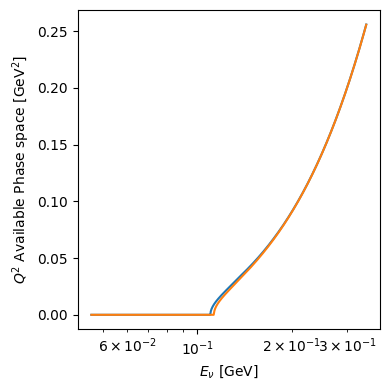

In [ ]:
enus = np.log(np.logspace(2E-2,0.15,1000))

low, up = AllowedQ2Range(enus, 14)

first_nonzero = np.nonzero(up - low)[0][0]
print("Threshold for numu on free neutron: %.3f" % enus[first_nonzero])


plt.plot(enus, up - low)
low, up = AllowedQ2Range(enus, -14)

first_nonzero = np.nonzero(up - low)[0][0]
print("Threshold for antinumu on free proton: %.3f" % enus[first_nonzero])

plt.plot(enus, up - low)

plt.xscale('log')
plt.xlabel(r"$E_\nu$ [GeV]")
plt.ylabel(r"$Q^2$ Available Phase space [GeV$^2$]")
plt.show()

#### 2.2.3: The Kinematically Constrained Differential Cross Section

So now we can calculate the kinematic and energetic limits, we should update our differential cross section plots. It is simplest to define a version of the differential cross section that returns 0 outside of the kinematic bounds. Even if this requires a little more computation than is strictly neccessary (we will often compute the bounds ) it gives us a very flexibile function which we can saftely pass any inputs into without being super careful about how we use it. If we give it silly inputs ($E_\nu = 10^{-5}$, $Q^2 = 10^{5}$), then it will just return $d\sigma/dQ^2 = 0$.

In [ ]:
def LSQEDSigmaDQ2Allowed_pb(E_nu_GeV, Q2_GeV2, nupid, M_V=M_V_GeV, M_A=M_A_GeV, MNtgt=None):

    #enu and Q2 but with the shape of np.broadcast(enu, Q2)
    enu = E_nu_GeV + np.zeros_like(Q2_GeV2)
    Q2 = Q2_GeV2 + np.zeros_like(E_nu_GeV)

    AllowedQ2Range = KinematicQ2Constraints(enu, nupid, MNtgt)

    Allowed = np.logical_and(Q2 >= AllowedQ2Range[0],Q2 <= AllowedQ2Range[1])

    dxs = np.zeros_like(Q2)

    dxs[Allowed] = LSQEDSigmaDQ2(enu[Allowed], Q2[Allowed], nupid, M_V=M_V, M_A=M_A) / pb

    return dxs

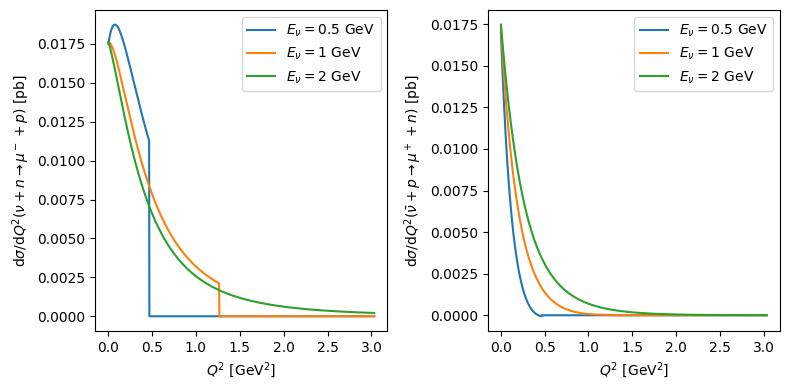

In [ ]:
enu0_5 = 0.5 #GeV
enu1 = 1 #GeV
enu2 = 2 #GeV

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(8,4))

Q2s = np.linspace(*KinematicQ2Constraints(2, 14),1000)

ax1.plot(Q2s, LSQEDSigmaDQ2Allowed_pb(enu0_5, Q2s, 14), label=r"$E_\nu = 0.5$ GeV")
ax1.plot(Q2s, LSQEDSigmaDQ2Allowed_pb(enu1, Q2s, 14), label=r"$E_\nu = 1$ GeV")
ax1.plot(Q2s, LSQEDSigmaDQ2Allowed_pb(enu2, Q2s, 14), label=r"$E_\nu = 2$ GeV")
ax1.set_ylabel(r"d$\sigma$/d$Q^{2} (\nu + n \rightarrow \mu^- + p)$ [pb]")
ax1.set_xlabel(r"$Q^{2}$ [GeV$^{2}$]")
ax1.legend()

ax2.plot(Q2s, LSQEDSigmaDQ2Allowed_pb(enu0_5, Q2s, -14), label=r"$E_\nu = 0.5$ GeV")
ax2.plot(Q2s, LSQEDSigmaDQ2Allowed_pb(enu1, Q2s, -14), label=r"$E_\nu = 1$ GeV")
ax2.plot(Q2s, LSQEDSigmaDQ2Allowed_pb(enu2, Q2s, -14), label=r"$E_\nu = 2$ GeV")
ax2.set_ylabel(r"d$\sigma$/d$Q^{2} (\bar{\nu} + p \rightarrow \mu^+ + n)$ [pb]")
ax2.set_xlabel(r"$Q^{2}$ [GeV$^{2}$]")
ax2.legend()

fig.show()

## 3: The Cross Section for the Hard Scatter

To calculate the cross section, $\sigma(E_{\nu})$, we now simply need to integrate the differential cross-section over the kinematically allowed space. We can use scipy to do this integral over the functions we already have:

In [ ]:
def LSQESigma(E_nu_GeV, nupid, M_V=M_V_GeV, M_A=M_A_GeV):
    Q2r = AllowedQ2Range(E_nu_GeV, nupid)
    return spi.quad(lambda Q2: LSQEDSigmaDQ2Allowed_pb(E_nu_GeV, Q2, nupid, M_V, M_A), *Q2r)[0]

print("Total cross section at 1 GeV: %.4f pb" % LSQESigma(1.0, 14))

Total cross section at 1 GeV: 0.0096 pb


Now lets make a plot of the cross section, we're hoping to see something like the below from the LS paper:
<div>

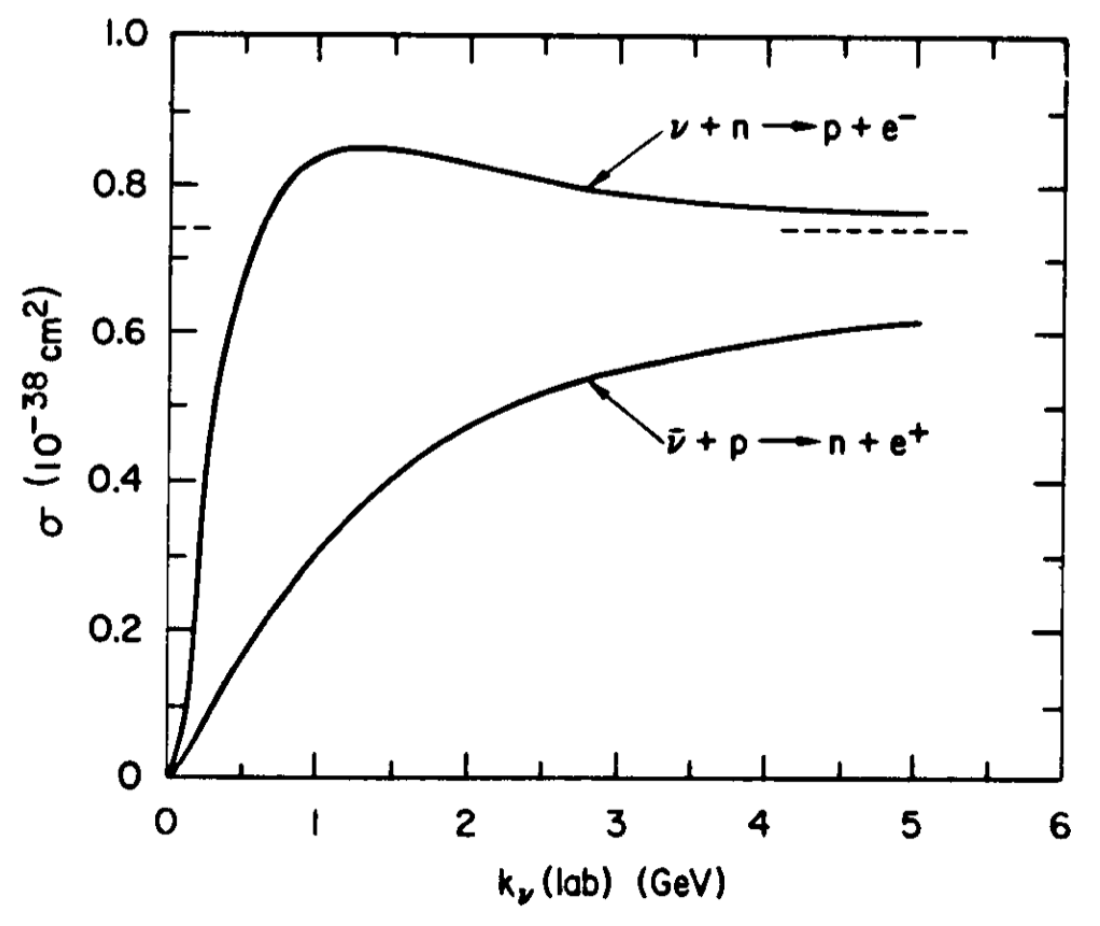

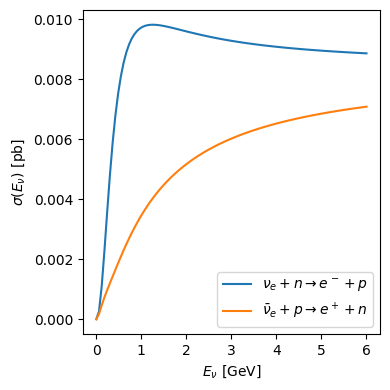

In [ ]:
enus = np.linspace(0,6,100)
sig_numu = [LSQESigma(enu,12) for enu in enus]
sig_numubar = [LSQESigma(enu,-12) for enu in enus]

plt.plot(enus,sig_numu,label=r"$\nu_e + n \rightarrow e^- + p$")
plt.plot(enus,sig_numubar,label=r"$\bar{\nu}_e + p \rightarrow e^+ + n$")
plt.ylabel(r"$\sigma(E_\nu)$ [pb]")
plt.xlabel(r"$E_\nu$ [GeV]")
plt.legend()
plt.show()

### 3.1: Success!

We have reproduced a plot from a 50 year old paper for two-body quasi-elastic scattering. Break out the champagne 🥂

**Points at LSQEDSigmaDQ2Physical** *Is this an event generator?*

**Slaps top of LSQESigma** *This function can calculate so many cross sections!*

Now we have implemented a model, its time to build the actual event generator.


#### Question 5

The normalisation is slightly different in our version of the plot. What effect do the values of $M_V$ and $M_A$ have on the cross section? If you match them to the paper, does the plot agree? If not... can you find a bug? (I can't... but I'm wondering if there is a typo in the maths)

In [ ]:
# Answer Q5 here

##### Model Answer

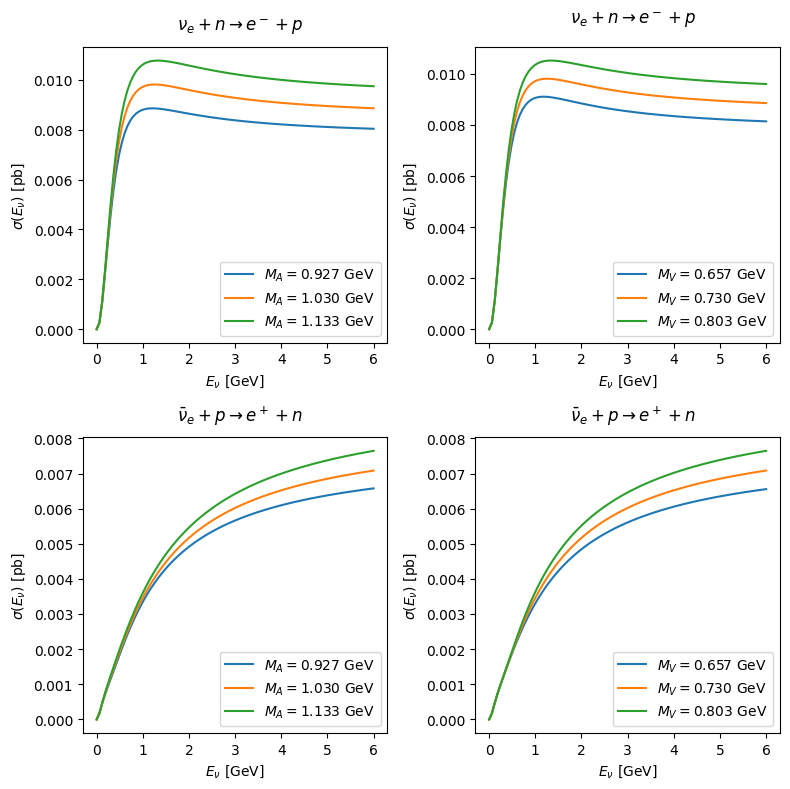

In [ ]:
enus = np.linspace(0,6,100)

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(8,8))

ax1.plot(enus,[ LSQESigma(enu, 12, M_A=M_A_GeV*0.9) for enu in enus ],label=r"$M_A =$" + "%.3f GeV" % (M_A_GeV*0.9))
ax1.plot(enus,[ LSQESigma(enu, 12, M_A=M_A_GeV) for enu in enus ],label=r"$M_A =$" + "%.3f GeV" % M_A_GeV)
ax1.plot(enus,[ LSQESigma(enu, 12, M_A=M_A_GeV*1.1) for enu in enus ],label=r"$M_A =$" + "%.3f GeV" % (M_A_GeV*1.1))
ax1.text(1.75, 0.012, r"$\nu_e + n \rightarrow e^- + p$", size="large")
ax1.set_ylabel(r"$\sigma(E_\nu)$ [pb]")
ax1.set_xlabel(r"$E_\nu$ [GeV]")
ax1.legend()

ax2.plot(enus,[ LSQESigma(enu, 12, M_V=M_V_GeV*0.9) for enu in enus ],label=r"$M_V =$" + "%.3f GeV" % (M_V_GeV*0.9))
ax2.plot(enus,[ LSQESigma(enu, 12, M_V=M_V_GeV) for enu in enus ],label=r"$M_V =$" + "%.3f GeV" % M_V_GeV)
ax2.plot(enus,[ LSQESigma(enu, 12, M_V=M_V_GeV*1.1) for enu in enus ],label=r"$M_V =$" + "%.3f GeV" % (M_V_GeV*1.1))
ax2.text(1.75, 0.012, r"$\nu_e + n \rightarrow e^- + p$", size="large")
ax2.set_ylabel(r"$\sigma(E_\nu)$ [pb]")
ax2.set_xlabel(r"$E_\nu$ [GeV]")
ax2.legend()

ax3.plot(enus,[ LSQESigma(enu, -12, M_A=M_A_GeV*0.9) for enu in enus ],label=r"$M_A =$" + "%.3f GeV" % (M_A_GeV*0.9))
ax3.plot(enus,[ LSQESigma(enu, -12, M_A=M_A_GeV) for enu in enus ],label=r"$M_A =$" + "%.3f GeV" % M_A_GeV)
ax3.plot(enus,[ LSQESigma(enu, -12, M_A=M_A_GeV*1.1) for enu in enus ],label=r"$M_A =$" + "%.3f GeV" % (M_A_GeV*1.1))
ax3.text(1.75, 0.0085, r"$\bar{\nu}_e + p \rightarrow e^+ + n$", size="large")
ax3.set_ylabel(r"$\sigma(E_\nu)$ [pb]")
ax3.set_xlabel(r"$E_\nu$ [GeV]")
ax3.legend()

ax4.plot(enus,[ LSQESigma(enu, -12, M_V=M_V_GeV*0.9) for enu in enus ],label=r"$M_V =$" + "%.3f GeV" % (M_V_GeV*0.9))
ax4.plot(enus,[ LSQESigma(enu, -12, M_V=M_V_GeV) for enu in enus ],label=r"$M_V =$" + "%.3f GeV" % M_V_GeV)
ax4.plot(enus,[ LSQESigma(enu, -12, M_V=M_V_GeV*1.1) for enu in enus ],label=r"$M_V =$" + "%.3f GeV" % (M_V_GeV*1.1))
ax4.text(1.75, 0.0085, r"$\bar{\nu}_e + p \rightarrow e^+ + n$", size="large")
ax4.set_ylabel(r"$\sigma(E_\nu)$ [pb]")
ax4.set_xlabel(r"$E_\nu$ [GeV]")
ax4.legend()

fig.show()

### 3.2: Some Physics To Think About While You Wait

* Why does the cross section flatten off for $\nu$? Does it flatten off for $\bar{\nu}$?
* Why is there a bump at low energy for $\nu$ and not for $\bar{\nu}$?
* What are the implications of the very different values of $\sigma_\nu$ and $\sigma_\bar{\nu}$ for CPV searches at few-GeV neutrino oscillation experiments?

## 4: Monte Carlo Sampling

The problem of building a Monte Carlo Event Generator (MCEG) is the problem of choosing all relevant properties of an event such that they statistically obey the input model(s). A single CCQE event chosen from our model may have any kinematically allowed $Q^2$, but if we choose $10^6$ separate events, we should be able to reproduce all of the predicted distributions of the model to a high degree of accuracy.

We will start with a simpler version of the 'choosing' problem though. How can we pick random numbers in the range $x \in [0,\pi]$ such that they are like according to $\sin{x}$?

### 4.1: Rejection Sampling

First, lets draw $\sin{x}$ over the interval to know what we're dealing with.

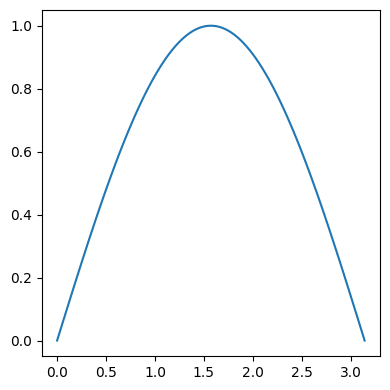

In [ ]:
x = np.linspace(0,pi,100)
plt.plot(x,np.sin(x))
plt.show()

The basic idea of rejection sampling, sometimes called 'accept/reject', is to throw pairs of random numbers over the domain and range of the function of interest and then 'reject' those that lie above the function. In this way you choose values along the domain, proportionally to the value of the function. We will wrap this logic in a simple function that takes a 1D function and its domain and range limits and illustrates the process. We will generalise this for our MCEG to use later.

In [ ]:
def plot_rejsample(f, fdomain, frange, ntries=1000, nbins=100, norm_point=None):

    #use numpy to throw us all of the random numbers that we'll need
    rvs = np.random.default_rng().random(2*ntries)

    # then transform these onto the desired domains and range
    xs = fdomain[0] + rvs[0:ntries] * (fdomain[1] - fdomain[0])
    ys = frange[0] + rvs[ntries:] * (frange[1] - frange[0])

    # keep track of the accepted and rejected samples
    accepted = ([],[])
    rejected = ([],[])

    # for the scatter plot, if we plot all samples it can be hard to
    #  visualise, so only plot the first 2500
    ntoscatter = 2500

    all_accepted = []

    # Here we commit the original sin of using python for loops. We will
    # improve this in a later version of this process.
    for x,y in zip(xs,ys):
        if y < f(x): # accept this sample
            if(ntoscatter > 0):
                accepted[0].append(x)
                accepted[1].append(y)
                ntoscatter -= 1

            all_accepted.append(x)
        elif(ntoscatter > 0): # reject this sample, but show the point as rejected
            rejected[0].append(x)
            rejected[1].append(y)
            ntoscatter -= 1
        # else, reject and ignore sample

    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(6,3))

    ax1.scatter(accepted[0], accepted[1])
    ax1.scatter(rejected[0], rejected[1])

    xpoints = np.linspace(fdomain[0], fdomain[1], 1000)
    ax1.plot(xpoints, [f(x) for x in xpoints], c="black")

    binvals, bins, _ = ax2.hist(all_accepted, bins=nbins)

    # if we've been given a point in the domain to use for normalisation, use that
    # this is only used for illustrative purposes so don't worry about it too much
    if norm_point:
      hnorm = np.interp(norm_point, (bins[:-1] + bins[1:])/2 ,binvals)
      fnorm = f(norm_point)
      renorm = hnorm/fnorm
    else:
      # Integrate the function so that we can rescale it to match the number of samples that we threw
      quadi, errori = spi.quad(f, *fdomain, epsabs=1e-3, epsrel=1e-3)
      hist_integral = len(all_accepted) * ((fdomain[1] - fdomain[0])/nbins)
      renorm = hist_integral/quadi

    ax2.plot(xpoints, [f(x) * renorm for x in xpoints], c="black", ls="dashed")
    ax2.set_ylabel("N Accepted")

    fig.show()

    print("Acceptance efficiency: %s/%s = %s%%" % (len(all_accepted),ntries, 100 * len(all_accepted)/ntries) )

Acceptance efficiency: 635987/1000000 = 63.5987%


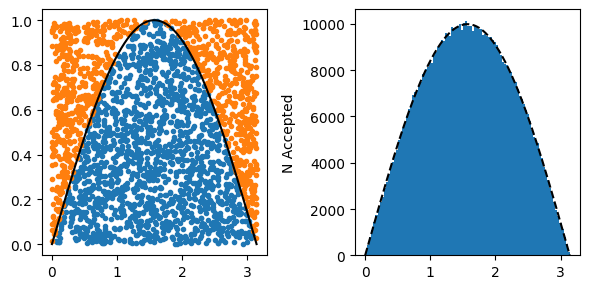

In [ ]:
plot_rejsample(f=np.sin,fdomain=(0,pi),frange=(0,1), ntries=1000000)

Not the smoothest histogram ever, but if you turn up the number of samples, it gets better and better. There are two important things to note here.

1) We ask for a number of tries, so the 'normalisation' of the histogram of the accepted samples is a function of how many requested, and not related to the mean value of the input function over the domain. The distribution of accepted samples only follows the **shape** of the input distribution. This will come up again later.
2) The technique works by 'wasting' function evaluations on rejected samples. If the function is costly to evaluate, and the sample acceptance efficiency is low, we may expend huge amount of compute for a relatively small number of useful samples.

### 4.2: Determining the Function Range

Finding the range of a general function is a class of problems with many possible approaches. A simple first approach that will work for many low dimensional problems is a simple grid search.

We can use `scipy` to do the maximum value finding for us. Lets use a slightly more fiddly function than just $\sin{x}$.

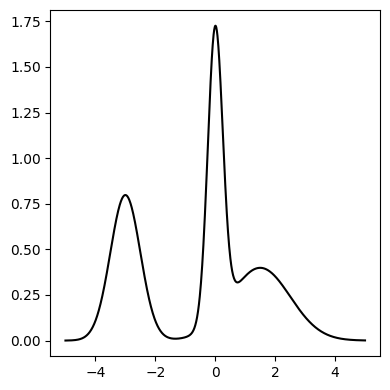

In [ ]:
def gaussian(x, mu, sigma):
    return (1/(sigma*np.sqrt(2*pi)))*np.exp(-0.5*np.power(x - mu,2)/np.power(sigma,2))

def myfunc(x):
    return gaussian(x,-3,0.5) + gaussian(x,0,0.25) + gaussian(x, 1.5,1)

xpoints = np.linspace(-5,5,1000)
plt.plot(xpoints, myfunc(xpoints), c="black")
plt.show()

Lets ask `scipy` to find the maximum (or actually the minimum of `-myfunc(x)`), there are various global minimizers in `scipy`, we will use the `optimize.differential_evolution` function here which seemed to work well with minimal inputs.

In [ ]:
import scipy.optimize as opt

result = opt.differential_evolution(lambda x: -myfunc(x), [(-5,5),])
max_func_val = -result.fun

print("Expected max at %.3f, found mx at %.3f" % (myfunc(0),max_func_val))

Expected max at 1.725, found mx at 1.726


So `scipy` managed to find it pretty well!

We should wrap this up into a little function as we will use it a lot.

To learn more about how this algorithm does global minimization, see the scipy docs, [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html), or the wikipedia article, [here](https://en.wikipedia.org/wiki/Differential_evolution).

In [ ]:
def getfmax(f, ranges):
  return -opt.differential_evolution(lambda x: -f(x), ranges).fun

##### Example Usage

In [ ]:
# 1D example
print(getfmax(f=lambda x: np.sin(x), ranges=[(0,pi),]))

# 2D example
print(getfmax(f=lambda x: np.sin(x[0]) + np.sin(x[1]), ranges=[(0,pi),(-pi,0)]))

0.9999999999998689
0.999999999999983


### 4.3: Sampling From An Arbitrary 1D Function

Lets use our example rejection sampler to plot the function.

Acceptance efficiency: 8596/50000 = 17.192%


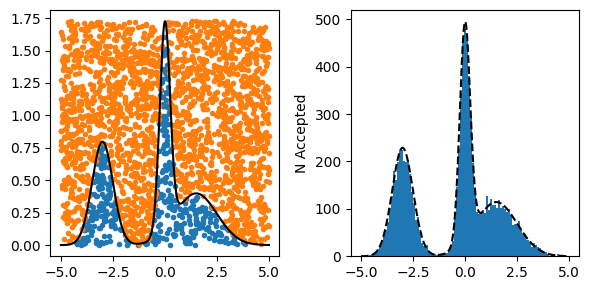

In [ ]:
fdomain = (-5,5)
frange = (0, getfmax(myfunc,[fdomain]))
plot_rejsample(f=myfunc, fdomain=fdomain, frange=frange, ntries=50000)

You should notice here that while the accepted samples have the correct statistical properties, a much smaller fraction of the throws are accepted, about $\lesssim$50% vs. $\sim$60% for the $\sin{x}$ problem. The reason for this should be obvious from the plots. The acceptance probability goes like the ratio of the integral of the function over the domain to the domain times the range. For sharply peaking functions that have a large domain, the efficiency of this method is poor. There are a number of methods that are better suited to functions like this, or functions with highly multivariate domains, but the details are outside the scope of this course.

Expanding the interval of the random variables beyond the true range of the function does not change the statistical distribution of the accepted samples, as each value along the domain is still chosen proportionally to the function value at that point. However, it does lower the efficiency, as can be seen in the example below.

Acceptance efficiency: 3464/100000 = 3.464%


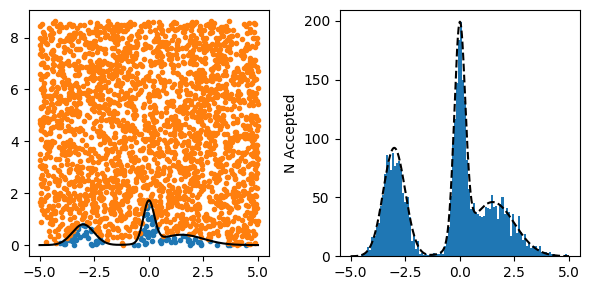

In [ ]:
fdomain = (-5,5)
frange = (0, getfmax(myfunc,[fdomain]) * 5)
plot_rejsample(f=myfunc, fdomain=fdomain, frange=frange, ntries=100000)

What about if we make the interval too small for the function range?

Acceptance efficiency: 40904/100000 = 40.904%


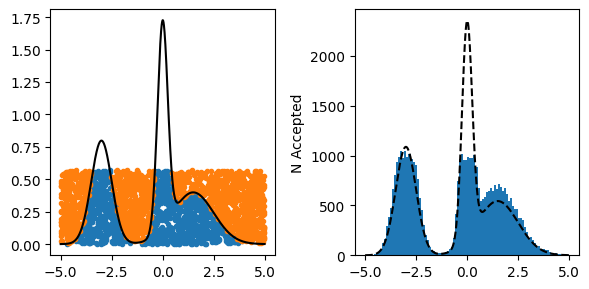

In [ ]:
fdomain = (-5,5)
frange = (0, getfmax(myfunc,[fdomain]) * 0.33)
plot_rejsample(f=myfunc, fdomain=fdomain, frange=frange, ntries=100000)

Here we can see that if the maximum value is incorrectly judged to be below the true maximum value of the function, the statistical properties of the accepted sample will no longer be correctly distributed according to the input function. As a result, it is vitally important for the validity of your sampler that the ceiling is carefully chosen to ensure that it is larger than the maximum function value.

As the dimensionality of the domain gets larger, and functions more *peaky*, grid searching can be slow, inefficient, or inaccurate at finding the true range of the function, it is quite common to add a bit of 'headroom' to the determined maximum (and minimum, if the function has negative values).

We are now equipped with all the tools to build our very first MCEG. It wont be the most efficient generator ever written, but it should be a valid implementation of the cross section model that we aimed to use.

#### Question 6

What happens if you get the lower end of the function range wrong? Too High or too low?

What about for functions that have have negative numbers in their range?

Is this much of a problem for us?

In [ ]:
# Answer Q6 here

##### Model Answer

If the ceiling is too low, we produce incorrectly distributed samples, but if it is too high, then the process *just* becomes less efficient.

If the floor is too low or too high, we produce incorrectly distributed samples.

Acceptance efficiency: 35957/100000 = 35.957%


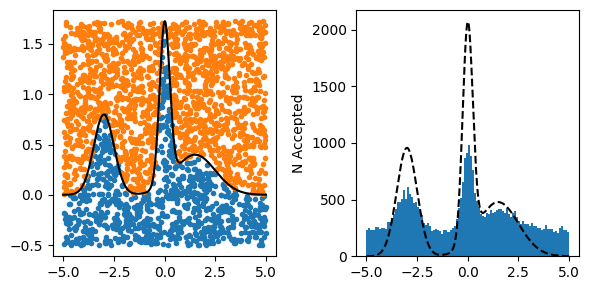

In [ ]:
fdomain = (-5,5)
frange = (-0.5, getfmax(myfunc,[fdomain]))
plot_rejsample(f=myfunc, fdomain=fdomain, frange=frange, ntries=100000)

Acceptance efficiency: 47770/100000 = 47.77%


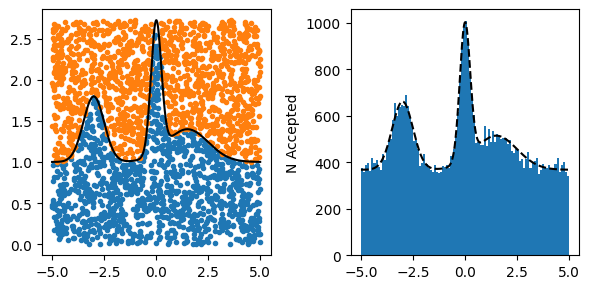

In [ ]:
fdomain = (-5,5)
frange = (0, getfmax(myfunc,[fdomain])+1)
plot_rejsample(f=lambda x: myfunc(x) + 1, fdomain=fdomain, frange=frange, ntries=100000)

Acceptance efficiency: 6313/100000 = 6.313%


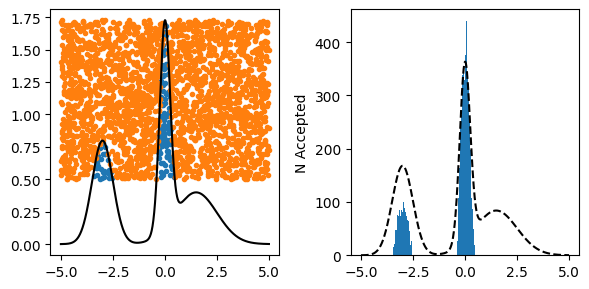

In [ ]:
fdomain = (-5,5)
frange = (0.5, getfmax(myfunc,[fdomain]))
plot_rejsample(f=myfunc, fdomain=fdomain, frange=frange, ntries=100000)

Lets see what happens with $\sin{x}$ over [-$\pi$/2,$\pi$] which has some negative range.

Acceptance efficiency: 60587/100000 = 60.587%
Acceptance efficiency: 56398/100000 = 56.398%
Acceptance efficiency: 65121/100000 = 65.121%


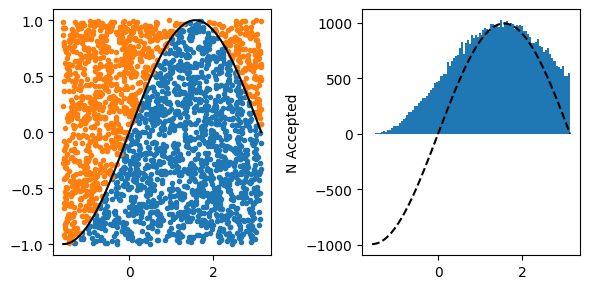

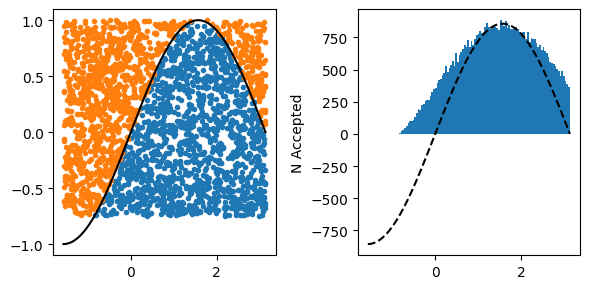

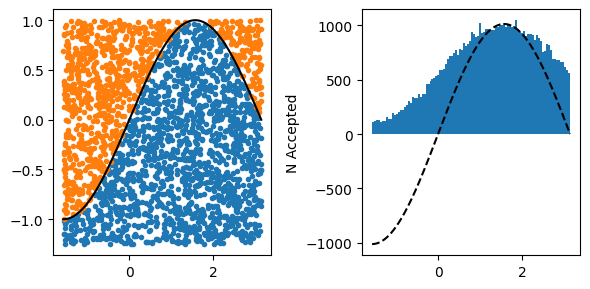

In [ ]:
plot_rejsample(f=np.sin, fdomain=(-pi/2,pi), frange=(-1,1), norm_point=pi/2, ntries=100000)
plot_rejsample(f=np.sin, fdomain=(-pi/2,pi), frange=(-0.75,1), norm_point=pi/2, ntries=100000)
plot_rejsample(f=np.sin, fdomain=(-pi/2,pi), frange=(-1.25,1), norm_point=pi/2, ntries=100000)

Hmmm, so seems like functions with negative range have to be treated quite carefully. This does make some sense, we're trying to pick samples using the function value to determine the acceptance probability.

A solution, is to add the negative part of the range to the function itself to force everything into the positive. Since we are only picking according to the **shape** of the function, we don't actually care about the absolute function value.

Acceptance efficiency: 60584/100000 = 60.584%


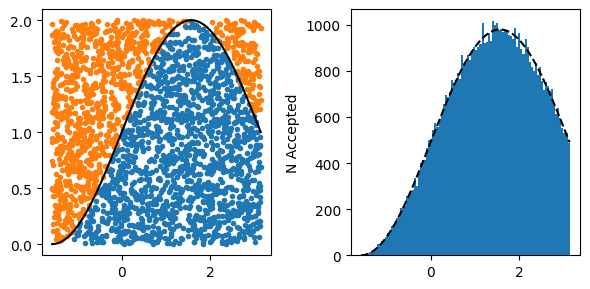

In [ ]:
plot_rejsample(f=lambda x: np.sin(x) + 1, fdomain=(-pi/2,pi), frange=(0,2), norm_point=pi/2, ntries=100000)

For many problems, you might have to be careful about determining the range floor. But for us, where we're sampling cross sections, taking the floor as 0 should pretty much always be fine!

## 5: The Free Nucleon Kinematics Picker

Let's try choosing $Q^2$ according to our differential cross section calculation. To do this correctly, we will need the range of $d\sigma/dQ^2$. As before, lets ask `scipy`.

Acceptance efficiency: 76667/100000 = 76.667%


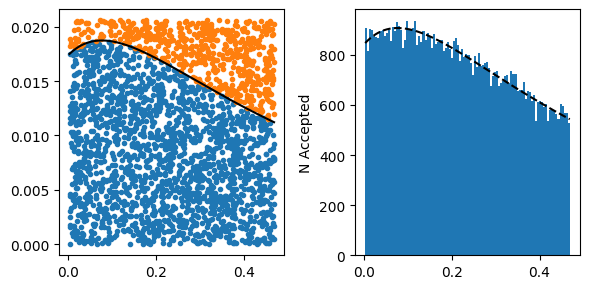

In [ ]:
enu = 0.5
nupid = 14

fdomain =  AllowedQ2Range(enu, nupid)
headroom = 1.1
frange = (0, getfmax(f=lambda Q2: LSQEDSigmaDQ2Allowed_pb(enu, Q2, nupid),
                     ranges=[fdomain]) * headroom)

plot_rejsample(f=lambda Q2: LSQEDSigmaDQ2Allowed_pb(enu, Q2, nupid),
               fdomain=fdomain, frange=frange, ntries=100000)

### 5.1: Our First Event Generator...
**Is this an event generator?** Sort of... its more of an interaction kinematics picker. To make a real event generator we want to resolve all the observable kinematics (which, luckily, we know how to do), predict the interaction rate for a given flux of input neutrinos, and package the result in some form that we can analyse.

We're going to define a new rejection sampling function that takes the number of samples to generate, rather than the number of tries to attempt. This means that if we ask for 1000 samples, we get 1000 samples. Functions that are more inefficient to sample simply take more CPU cycles to produce our *events*.

#### 5.1.1: MC Integration

We will also take advantage of the fact that a by-product of rejection sampling, evaluating the function of interest randomly and uniformly over its domain, is in fact the same as [Monte Carlo integration](https://en.wikipedia.org/wiki/Monte_Carlo_integration).

MC integration lets us approximate:

$I = \int_\Omega f(\mathbf{x}) d\mathbf{x}$, over the domain of $f$, $\Omega \in \mathcal{R}^n$, by choosing $N$ discrete samples, $\mathbf{x}_i$, uniformly over $\Omega$, as:

$I \simeq Q = \frac{V}{N} \sum_i^N f(\mathbf{x}_i)$, where: $V = \int_\Omega d\mathbf{x}$.

As a result, if we take the mean of all of our function evaluations, and multiply by the hyper-volume of the domain, we get an estimate for the integral of $f$, 'for free'. It is also useful to know the uncertainty on that estimate after N evaluations, which we can calculate like:

$\sigma_I = V \sqrt{\left<f(\mathbf{x}_i)^2\right> - \left<f(\mathbf{x}_i)\right>^2}$

The real power of this technique is that it doesn't depend on the dimensionality of the domain, $n$. It is generally better than deterministic integration procedures for $n\gtrsim4$.

Below we define a new version of our rejection sampling function that makes better use of `numpy` and also reports the integral over $f(x)$. It will also use `scipy` to guess the ceiling of the range for us if it we don't specify it from outside.

In [ ]:
def rejsample1D(f, fdomain, nsamples, frange=None, blocksize=1000, headroom=1.1):

    # we can pass in a range interval, but if we don't use scipy to determine
    #  the ceiling and assume that the floor should be 0.
    if frange == None:
      frange = (0, getfmax(f, [fdomain]) * headroom)

    samples = np.empty(0)
    fvals = np.empty(0)
    fvals2 = np.empty(0)
    ntries = 0

    rng = np.random.default_rng()

    while samples.shape[0] < nsamples:
        #to make the best use of numpy vectorisation we will
        #  work in blocks until we have at least enough samples

        rvs = rng.random(2*blocksize)

        # then transform these onto the desired domains and range
        x = fdomain[0] + rvs[0:blocksize] * (fdomain[1] - fdomain[0])
        y = frange[0] + rvs[blocksize:] * (frange[1] - frange[0])

        fx = f(x)

        # determine which of the samples we accept
        accepted = y < fx
        # keep only the samples that we accept
        samples = np.append(samples, x[accepted])

        # keep track of all function evaluations for performing integrals
        fvals = np.append(fvals, fx)
        fvals2 = np.append(fvals2, np.square(fx))

        ntries += blocksize

    return samples[0:nsamples], \
        fvals.mean() * (fdomain[1] - fdomain[0]), \
        np.sqrt((fvals2.mean() - np.square(fvals.mean()))/(ntries-1)) * (fdomain[1] - fdomain[0]), \
        ntries

#### Question 7

Can you calculate the cross section for a 1 GeV muon neutrino from MC integration?

How does it compare to our previous technique?

In [ ]:
# Answer Q6 here

# Hint:
# we already have a function for calculating the integral deterministically with
spiquadint = LSQESigma(enu,nupid)
print("Total cross section for 1 GeV muon neutrinos from spi.quad integration: %.6f pb" % spiquadint)

# Can you use rejsample1D to calculate the integral with MC?


Total cross section for 1 GeV muon neutrinos from spi.quad integration: 0.007393 pb


##### Model Answer

It agrees within errors! (as it should).

Total cross section for 1 GeV muon neutrinos from MC integration: 0.009630 +/- 0.000012 pb
Total cross section for 1 GeV muon neutrinos from spi.quad integration: 0.009633 pb


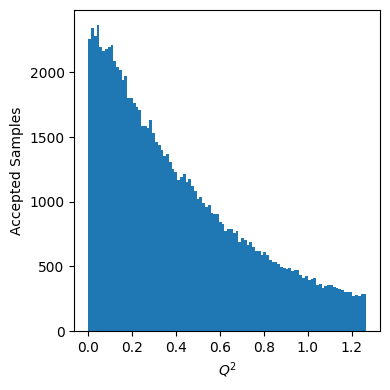

In [ ]:
enu = 1
nupid = 14

Q2Samples, sigint, error, ntries = \
  rejsample1D(f=lambda Q2: LSQEDSigmaDQ2Allowed_pb(enu, Q2, nupid),
              fdomain=AllowedQ2Range(enu, nupid), nsamples=100000)

print("Total cross section for 1 GeV muon neutrinos from MC integration: %.6f +/- %.6f pb" % (sigint, error))
print("Total cross section for 1 GeV muon neutrinos from spi.quad integration: %.6f pb" % LSQESigma(enu,nupid))

plt.hist(Q2Samples)
plt.ylabel("Accepted Samples")
plt.xlabel(r"$Q^2$")
plt.show()

### 5.2: Choosing Kinematics

For each chosen $Q^2$, we then can calculate the observable kinematics. Lets make our first histogram of observable kinematics from our budding event generator!

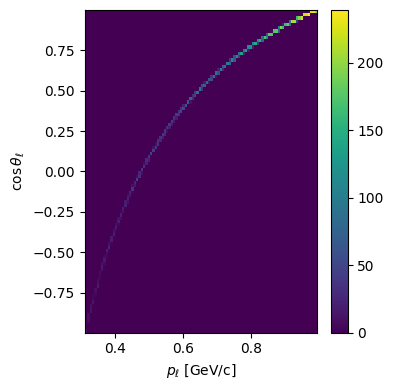

In [ ]:
enu = 1
nupid = 14

Q2Samples, _, _, _ = \
  rejsample1D(f=lambda Q2: LSQEDSigmaDQ2Allowed_pb(enu, Q2, nupid),
              fdomain=AllowedQ2Range(enu, nupid),
              nsamples=10000)

events = KinematicsBlob(enu, Q2Samples, nupid)

plt.hist2d(events.plep, events.lepct, bins=[100,100])
plt.ylabel(r"$\cos{\theta_\ell}$")
plt.xlabel(r"$p_\ell$ [GeV/c]")
plt.colorbar()
plt.show()

This looks as expected from our kinematic constraint plots that we made earlier, but now we can see the effect of the cross section shape as a function of $Q^2$ where events are more likely to be 'forward' (small $\theta_\ell$).

### 5.3: Success!

We're going from strength to strength. This really now is our first event generator. It takes an energy and neutrino species as input, and gives us predictions of observable events from our implemented model. While doing so, it also calculates and returns the cross section.

## 6: A Spread of $\nu$ Energies

One glaring issue with our event generator so far is that we have only used it for single neutrino energies at a time. Real neutrino beams have significant spectral width, so before we can use our generator to make predictions for some actual data we need to decide how to incorporate multiple energies.

There are various ways to approach this step. Each attempt to solve the integral:
$N = \iint\Phi(E_\nu)\frac{\text{d}\sigma}{\text{d}\mathbf{x}}(E_\nu,\mathbf{x}) dE_\nu d\mathbf{x}$,
where $\Phi(E_\nu)$ is the neutrino flux and $\mathbf{x}$ are the kinematic variables that the model(s) are encoded in, in our case, $Q^2$.

We are going to discuss two approaches:

1) Sample the multivariate integrand directly by choosing samples according to $\Phi(E_\nu)\frac{\text{d}\sigma}{\text{d}\mathbf{x}}(E_\nu,\mathbf{x})$. <br>
2) Factorise the problem by pre-calculating $\sigma(E_\nu) = \int \frac{\text{d}\sigma}{\text{d}\mathbf{x}}(E_\nu,\mathbf{x}) d\mathbf{x}$ over a grid of $E_\nu$ so that you can pick $E_\nu$ from $\Phi(E_\nu)\sigma(E_\nu)$ and then pick $\mathbf{x}$ from $\frac{\text{d}\sigma}{\text{d}\mathbf{x}}(E_\nu,\mathbf{x})|_{E_\nu}$.

We will devote attention to both approaches, because both are central techniques in neutrino MCEGs in common use.

### 6.1: Multivariate Sampling

For the first approach, we can extend our `rejsample1D` function to sample both $E_\nu$ and $Q^2$ simultaneously.

We will start with a simple toy gaussian neutrino energy spectrum as below:

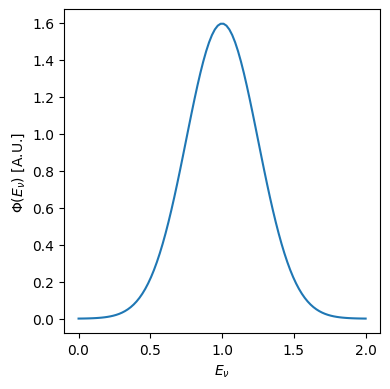

In [ ]:
def frozen_gaussian(mu, sigma):
  return lambda x: gaussian(x, mu, sigma)

enu_dist = frozen_gaussian(mu=1, sigma=0.25)
enus = np.linspace(0,2,100)

plt.plot(enus,enu_dist(enus))
plt.ylabel(r"$\Phi(E_\nu)$ [A.U.]")
plt.xlabel(r"$E_\nu$")
plt.show()

Let's use numpy to write an MC sampling function that works for an arbitrary number of dimensions. The details of the rejection sampling in multiple dimensions are exactly the same:

* throw a random point within the hyper-volume of the domain and range of the function of interest,
* accept if the point is 'lower' than the function value at the chosen domain point.

We're going to add a bit of prophelatic safety in here too. If we make, $N_{max}$ tries, without accepting a single sample, then it is likely we have set out domains incorrectly or ended up in some very tight corner of phase space/float imprecision space. To stop the notebook from getting stuck in an infinite loop, if we make too many throws with, then raise an exception and make a mess of the execution.

Often you should know before sampling whether you will get stuck in an infinite loop, but sometimes you can get stuck. Sometimes the kinematic limits are not simply analytic, or very complicated, and its easier to try to generate an event and give up when it seems very probably unphysical. If we were writing a real generator, we probably wouldn't raise an exception, but would return from the sampler with some error code. For this generator, we don't expect any infinite loops, and getting stuck is probably a bug. I'd rather know about it.

In [ ]:
def rejsample(f, fdomain, nsamples, frange=None, blocksize=1000, headroom=1.1, giveup_after=1E5):
    # make sure our domain is a matrix, even if we are only sampling from
    #   a 1D function
    fdomain = np.atleast_2d(fdomain)

    if frange == None:
      frange = (0, getfmax(f, fdomain) * headroom)

    ndim = fdomain.shape[0]

    # the domain hyper-volume
    volume = np.diff(fdomain).prod()

    samples = np.atleast_2d([])
    fvals = np.empty(0)
    fvals2 = np.empty(0)

    rng = np.random.default_rng()

    # determine our RNG transformations to take [0-1] to [fdomain] and [frange]
    rngstart = np.atleast_2d(np.concatenate((fdomain,[frange,]))[:,0]).transpose()
    rngscale = np.atleast_2d(np.diff(np.concatenate((fdomain,[frange,]))))

    ntries = 0
    tries_since_last_accept = 0

    while samples.shape[1] < nsamples:
        # to make the best use of numpy vectorisation we will
        #   work in blocks until we have at least enough samples
        #   first, generate ndims + 1 x blocksize random numbers
        rvs = rng.random((ndim+1,blocksize))
        # then transform these onto the desired domains and range
        rvs = rngstart + (rvs * rngscale)

        # calculate f consuming all but the last row of random numbers
        fx = f(rvs[0:-1])

        # the last row is used as the acceptance throw
        accepted = rvs[-1] < fx

        # This copies each time. The copy itself will be relatively efficient
        #   but if you have a small blocksize, you might have a bad time
        if samples.shape[1]:
          samples = np.append(samples, np.atleast_2d(rvs[0:-1][...,accepted]), axis=1)
        else: # We have to treat the first block of samples specially otherwise
              #   numpy gets upset
          samples = np.atleast_2d(rvs[0:-1][...,accepted])

        fvals = np.append(fvals, fx)
        fvals2 = np.append(fvals2, np.square(fx))

        # This is us keeping track of when we last accepted a sample
        if(accepted.sum() == 0):
          tries_since_last_accept + blocksize
        else:
          tries_since_last_accept = 0

        # Let's just give up
        if tries_since_last_accept > giveup_after:
          raise RuntimeError("Giving up with this function after %s attempts"\
          " toselect a sample. So far we have selected %s samples from % tries"\
                             % (tries_since_last_accept, samples.shape[1], ntries))

        ntries = ntries + blocksize

    fvmean = fvals.mean()

    return *samples[...,0:nsamples], \
            fvmean * volume, \
            np.sqrt((fvals2.mean() - np.square(fvmean))/(ntries-1)) * volume if ntries > 1 else 0, \
            ntries

##### Example Usage

Check that this 'general' function seems to work in 1, 2, and 3 dimensions for good measure.

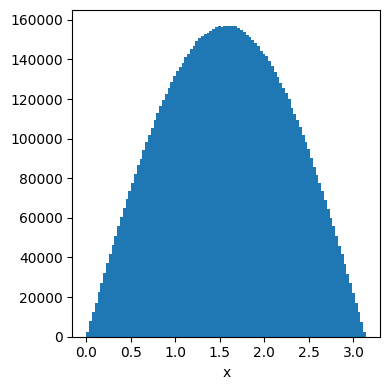

CPU times: user 1.98 s, sys: 1.04 s, total: 3.03 s
Wall time: 2.83 s


In [ ]:
%%time
xsamples, _, _, ntries = \
  rejsample(np.sin,
            [(0,pi),], frange=(0,1), nsamples=int(1E7), blocksize=int(1E6))

plt.hist(xsamples)
plt.xlabel("x")
plt.show()

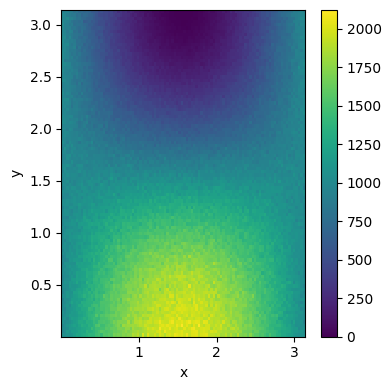

Efficiency: 47.619% = 10000000/21000000
CPU times: user 4.73 s, sys: 1.49 s, total: 6.22 s
Wall time: 6.24 s


In [ ]:
%%time
xsamples, ysamples, _, _, ntries = \
  rejsample(lambda x: np.sin(x[0]) * np.cos(x[1]),
            [(0,pi),(0,pi)], frange=(-1,1), nsamples=int(1E7), blocksize=int(1E6))

plt.hist2d(xsamples, ysamples, bins=(100,100))
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar()
plt.show()
print("Efficiency: %.3f%% = %s/%s" % (100*len(xsamples)/ntries,len(xsamples),ntries))

A few seconds for 10 million accepted samples from 20 million function evaluations is not bad.

Efficiency: 18.182% = 10000000/55000000
CPU times: user 14.4 s, sys: 7.76 s, total: 22.1 s
Wall time: 22.2 s


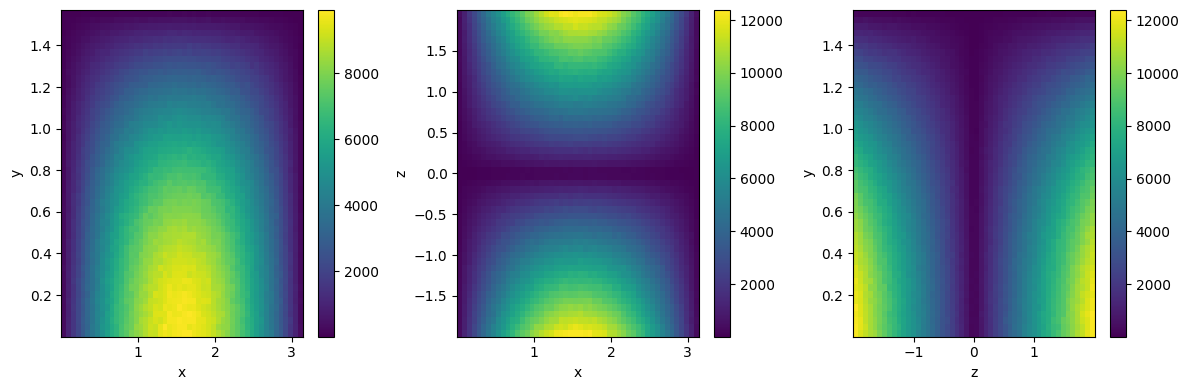

In [ ]:
%%time
xsamples, ysamples, zsamples, _, _, ntries = \
  rejsample(lambda x: np.sin(x[0]) * np.cos(x[1]) * np.abs(x[2]),
            [(0,pi),(0,pi/2),(-2,2)], nsamples=int(1E7), blocksize=int(1E6))

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(12,4))

h1 = ax1.hist2d(xsamples, ysamples, bins=(50,50))
ax1.set_xlabel("x")
ax1.set_ylabel("y")
h2 = ax2.hist2d(xsamples, zsamples, bins=(50,50))
ax2.set_xlabel("x")
ax2.set_ylabel("z")
h3 = ax3.hist2d(zsamples, ysamples, bins=(50,50))
ax3.set_xlabel("z")
ax3.set_ylabel("y")

fig.colorbar(h1[3],ax=ax1)
fig.colorbar(h2[3],ax=ax2)
fig.colorbar(h3[3],ax=ax3)

fig.show()
print("Efficiency: %.3f%% = %s/%s" % (100*len(xsamples)/ntries,len(xsamples),ntries))

#### 6.1.1 Sampling from the Flux and Differential Cross Section

Now lets look at the function we actually want to sample in 2D to get some intuition about its shape. First, lets define a factory function that lets us create an event rate function with the flux mean and width, and the neutrino species pre-selected.

In [ ]:
def MakeEventRateGausFlux(flux_mean, flux_width, nupid):
    enu_dist = frozen_gaussian(flux_mean, flux_width)
    return lambda enu, Q2: LSQEDSigmaDQ2Allowed_pb(enu, Q2, nupid) * enu_dist(enu)

then we can draw the function surface and see what we're dealing with

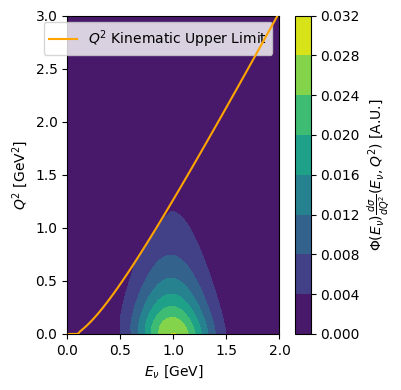

In [ ]:
from matplotlib import cm

numpoints = 50

nupid = 14
enus = np.linspace(0,2,numpoints)
Q2s = np.linspace(*AllowedQ2Range(2, nupid), numpoints)

enus, Q2s = np.meshgrid(enus, Q2s)

evrate = MakeEventRateGausFlux(flux_mean=1, flux_width=0.25, nupid=14)

# some of our functions don't play nice with the 2D numpy inputs that meshgrid
#  produces, flatten them out to 1d arrays and then reshape the result back to
#  2d for plotting with contourf.
phidsdQ2 = evrate(enus.reshape(numpoints**2), Q2s.reshape(numpoints**2))\
            .reshape((numpoints,numpoints))

plt.contourf(enus, Q2s, phidsdQ2, zorder=1)
plt.plot(np.linspace(0,2,100), AllowedQ2Range(np.linspace(0,2,100), nupid)[1],
         zorder=10, c="orange", label=r"$Q^2$ Kinematic Upper Limit")
plt.axis('scaled')
plt.xlabel(r"$E_\nu$ [GeV]")
plt.ylabel(r"$Q^2$ [GeV$^2$]")
plt.colorbar(label=r"$\Phi(E_\nu)\frac{d\sigma}{dQ^2}(E_\nu,Q^2)$ [A.U.]")
plt.ylim([0,3])
plt.legend()
plt.show()



It looks like a simple, single-peaking function so we use `scipy` to find the maximum as before and then sample $Q^2$ and $E_\nu$ simultaneously, and calculate the observable kinematics.

#### 6.1.1 Foot Guns and Coordinate Transformations

A common pitfall when sampling functions like this is to throw along the first dimension, *e.g.* $E_\nu$, and then based on that random choice, pick a throw range for the second dimension, *e.g.* $Q^2$, based on some known kinematic constraints. This seems like an optimisation: if we know we will be choosing a given $E_\nu$, why would we pick an unphysical $Q^2$? Unfortunately, the rejection sampling formalism requires a hyper-rectangular throw volume, and this 'optimisation' breaks that assumption. There are many optimised techniques for function sampling, the details of which are outside the scope of this course.

However, if we can express these physical limits analytically, then we can perform a change of variables: $\iint f(x,y) dxdy \rightarrow \iint f(x,y(u)) \frac{dy}{du} dxdu$, where $\frac{dy}{du}$ is the Jacobian of the transformation. If we can do this such that the limits of $u$ are independent of $x$, usually $u \in [0,1]$, then we can get around the 'wasted' phase space problem.

We might be able to express the kinematic limits as a change of variables, but I didn't try. What this means for our use of rejection sampling is that we always have to throw within the maximum $Q^2$ over the domain of $E_\nu$ that we are sampling.

Sampling efficiency = 5.00 %
Event rate from MC integration: 0.00939 +/- 7.85997e-06 [A.U.]
CPU times: user 12.1 s, sys: 6.14 s, total: 18.2 s
Wall time: 20.2 s


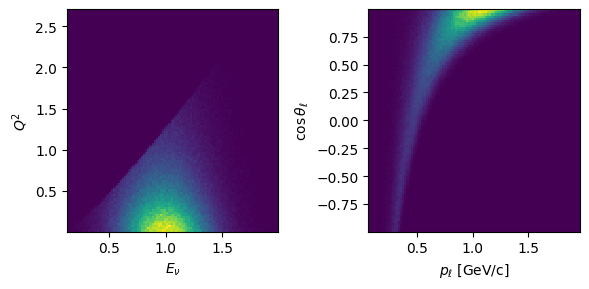

In [ ]:
%%time
nupid = 14

evrate = MakeEventRateGausFlux(flux_mean=1, flux_width=0.25, nupid=14)

# remember we have to use the Q2 range of the highest energy we are
# sampling to ensure that the sample volume is hyper-rectangular
enur = (0,2)

nsamples = 500000

EnuSamples, Q2Samples, sigint, error, ntries = \
    rejsample(f=lambda x: evrate(x[0],x[1]),
              fdomain=[enur, AllowedQ2Range(enur[1], nupid)],
              nsamples=nsamples, blocksize=int(nsamples/20))

multivar_events = KinematicsBlob(EnuSamples, Q2Samples, nupid)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(6,3))

ax1.hist2d(EnuSamples, Q2Samples, bins=100)
ax1.set_ylabel(r"$Q^2$")
ax1.set_xlabel(r"$E_\nu$")

ax2.hist2d(multivar_events.plep, multivar_events.lepct, bins=100)
ax2.set_ylabel(r"$\cos{\theta_\ell}$")
ax2.set_xlabel(r"$p_\ell$ [GeV/c]")

fig.show()

print("Sampling efficiency = %.2f %%" % (100 * nsamples/ntries))
print("Event rate from MC integration: %.5f +/- %.5e [A.U.]" % (sigint, error))

### 6.2: Factorising the Problem

The statistically correct choosing of interacting neutrino energies and the choosing of kinematics for those chosen interactions can be factorised with some pre-calculation. We have already actually done this pre-calculation.

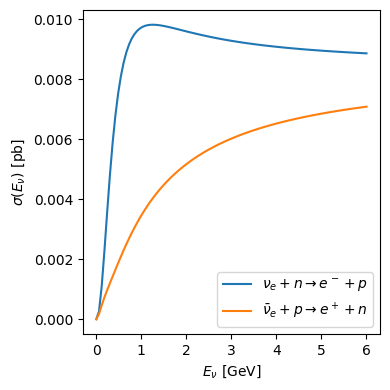

In [ ]:
enus = np.linspace(0,6,100)
sig_numu = [LSQESigma(enu,12) for enu in enus]
sig_numubar = [LSQESigma(enu,-12) for enu in enus]

plt.plot(enus,sig_numu,label=r"$\nu_e + n \rightarrow e^- + p$")
plt.plot(enus,sig_numubar,label=r"$\bar{\nu}_e + p \rightarrow e^+ + n$")
plt.ylabel(r"$\sigma(E_\nu)$ [pb]")
plt.xlabel(r"$E_\nu$ [GeV]")
plt.legend()
plt.show()

Those of you who have used the GENIE event generator should identify this construction with the 'splines' that need to be calculated or fetched before events can be generated efficiently. NEUT also uses a similar procedure, but the tables used are smaller and so are generally not distributed separately.

In [ ]:
def MakeEventRateGausFluxSpline(flux_mean, flux_width, nupid):
    enu_dist = frozen_gaussian(flux_mean, flux_width)
    enu_knots = np.linspace(0,flux_mean + 10*flux_width, 250)
    totxs = np.array([LSQESigma(enu, nupid) for enu in enu_knots])
    return lambda enu: np.interp(enu, enu_knots, totxs) * enu_dist(enu)

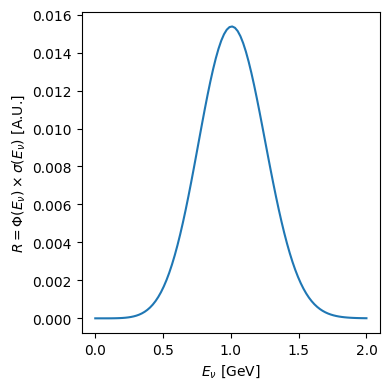

Event rate from spi.quad integration: 0.00938 +/- 1.44013e-08 [A.U.]


In [ ]:
nupid = 14
enur = (0,2)
enus = np.linspace(*enur,100)

evrate = MakeEventRateGausFluxSpline(flux_mean=1, flux_width=0.25, nupid=14)

plt.plot(enus, evrate(enus))
plt.xlabel(r"$E_\nu$ [GeV]")
plt.ylabel(r"$R = \Phi(E_\nu)\times \sigma(E_\nu)$ [A.U.]")
plt.show()

fint, finterr = spi.quad(lambda E_nu_GeV: evrate(E_nu_GeV), *enur)
print("Event rate from spi.quad integration: %.5f +/- %.5e [A.U.]" % (fint, finterr))

So the pre-calculation agrees on the integrated event rate with the MC sampling of the multivariate space, which is a good sanity/closure check.

Let's generate some events!

First we will pick $E_\nu$ samples from the event rate.

In [ ]:
nupid = 14

enur = (0, 2)

nsamples = 500000

EnuSamples, sigint, errint, nenutries = \
    rejsample(f=evrate, fdomain=enur, nsamples=nsamples,
              blocksize=int(nsamples/20))

print("Sampling efficiency = %.2f %%" % (100 * nsamples/nenutries))
print("Event ratefrom 1D MC integration: %.5f +/- %.5e [A.U.]" % (sigint, errint))

Sampling efficiency = 27.40 %
Event ratefrom 1D MC integration: 0.00938 +/- 7.99956e-06 [A.U.]


The key point to notice here is that the sampling efficiency is much higher than the multivariate approach. The 2D sampling efficiency overall was about 5%. Neutrino fluxes are generally quite peaking distributions with long high-energy tails that are important to capture, which can make naive rejection sampling in a hyper-rectangular volume quite inefficient. As the dimensionality of the interaction model increases, the naive sampling efficiency of the multi-variate technique can become prohibitively inefficient. This is the motivating idea behind the pre-calculation approach.

Then for each enu sample, we pick a $Q^2$ and calculate the kinematics. We still need to know the maximum differential cross section as a function of both $E_\nu$ and $Q^2$ to allow us to rejection sample $Q^2$ correctly. We can calculate it in the same way as before.

To make use of `numpy` vectorisation, we're going to have to write a new rejection sampling algorithm to keep throwing random events at the pre-chosen fixed $E_\nu$ values until we have one $Q^2$ sample for each $E_\nu$. For relative simplicity, we're going to write a special version of the 1D rejection sampler, rather than the general multivariate implementation we wrote before.

This is a very special function. It shouldn't be taken as an example for how to solve this problem. We've had to work around a few sharp edges in the functions we've already built to allow us to use some numpy vectorisation. It still ends up faster at sampling than the full multivariate sampler, and is more function-evaluation-efficient.

In [ ]:
def rejsampleDSig1D_FixedEnuSamples(Enus, fDSigma, domainfunc, headroom=1.1, give_up_after=100):


    # to start with, we haven't filled any samples
    samples = np.full_like(Enus, -1.0)

    # pre-calculate all the kinematic limits
    fdomain = domainfunc(Enus)
    # use the Q2 domain of the highest Enu to calculate the frange
    frange = (0,
        getfmax(lambda x: fDSigma(*x),
               [[Enus.min(),Enus.max()], fdomain[...,Enus.argmax()]]))

    ntries = 0

    rng = np.random.default_rng()

    to_fill = (samples == -1.0)
    nto_fill = to_fill.sum()

    ntries_since_last_accept = 0

    # to make the best use of numpy vectorisation we will
    #   work in blocks until we have filled all the samples.
    #   This gets asymptotically slow for the last few samples,
    #   but its better than looping over the events in python
    while nto_fill > 0:

        # throw 2 random numbers for each sample we still need to generate
        rvs = rng.random(2*nto_fill)

        # then transform these onto the desired domains and range
        x = fdomain[0,to_fill] + rvs[0:nto_fill] * (fdomain[1,to_fill] - fdomain[0,to_fill])
        y = frange[0] + rvs[nto_fill:] * (frange[1] - frange[0])

        # evaluate the 1D differential cross section
        fx = fDSigma(Enus[to_fill], x)

        # need a boolean array of the full size that only contains true
        # for values to *newly* accept this loop. Have to force the type or it
        # defaults to float and gets sad
        accepted = np.zeros_like(samples, dtype=bool)
        accepted_from_thrown = y < fDSigma(Enus[to_fill], x)
        accepted[to_fill] = accepted_from_thrown

        samples[accepted] = x[accepted_from_thrown]

        ntries += nto_fill

        to_fill = (samples == -1.0)
        nto_fill = to_fill.sum()

        # sum of the boolean array tells us how many we've newly accepted
        if accepted_from_thrown.sum() == 0:
          ntries_since_last_accept += 1
        else:
          ntries_since_last_accept = 0

        if ntries_since_last_accept > give_up_after:
          raise RuntimeError("giving up after %s attempts" % ntries_since_last_accept)

    return samples, ntries

Q2 Sampling efficiency = 13.86 %
CPU times: user 4.09 s, sys: 266 ms, total: 4.35 s
Wall time: 6.63 s


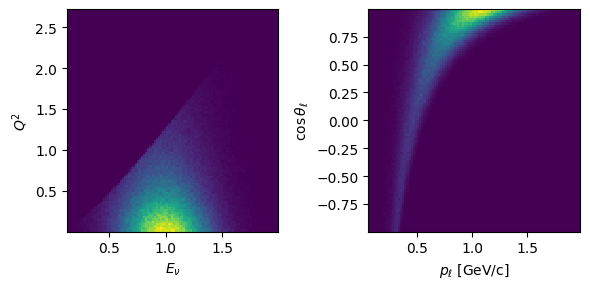

In [ ]:
%%time

Q2Samples, q2tries = rejsampleDSig1D_FixedEnuSamples(Enus=EnuSamples,
                      fDSigma=lambda enu, Q2 : LSQEDSigmaDQ2Allowed_pb(enu, Q2, nupid),
                      domainfunc=lambda enu : AllowedQ2Range(enu, nupid))

factorised_events = KinematicsBlob(EnuSamples, Q2Samples, nupid)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(6,3))

ax1.hist2d(EnuSamples, Q2Samples, bins=100)
ax1.set_ylabel(r"$Q^2$")
ax1.set_xlabel(r"$E_\nu$")

ax2.hist2d(factorised_events.plep, factorised_events.lepct, bins=100)
ax2.set_ylabel(r"$\cos{\theta_\ell}$")
ax2.set_xlabel(r"$p_\ell$ [GeV/c]")

fig.show()

print("Q2 Sampling efficiency = %.2f %%" % (100 * len(EnuSamples)/(nenutries+q2tries)))

So here we can see that the sampling efficiency appears to be about 3 times higher for the factorised problem.

Lets just do our due diligence and check that the two approaches agree on the distribution of observable kinematics.

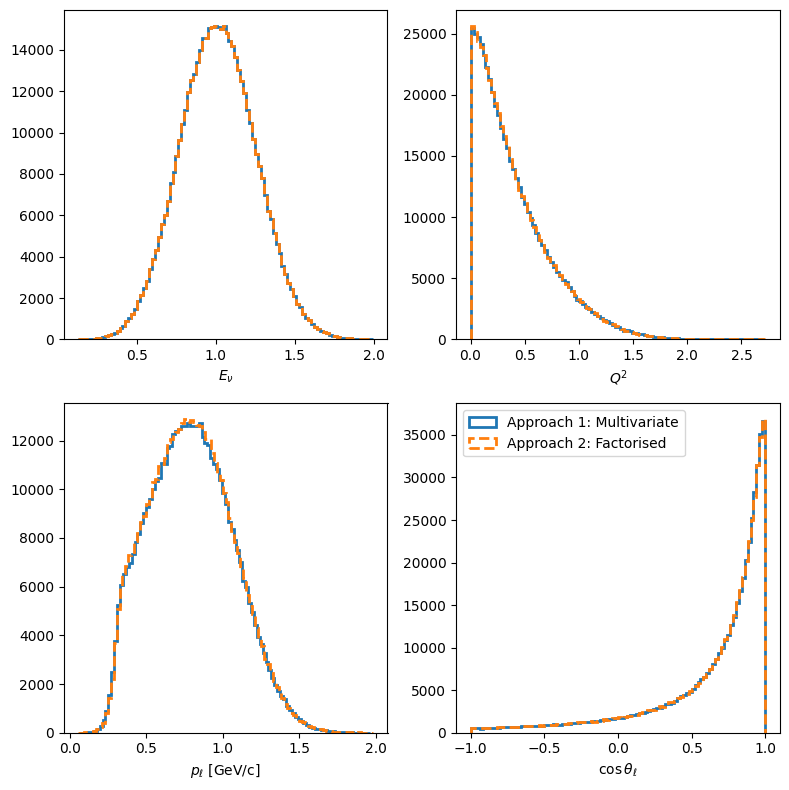

In [ ]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(8,8))

ax1.hist(multivar_events.enu, bins=100, histtype="step", lw=2)
ax1.hist(factorised_events.enu, bins=100, histtype="step", lw=2, ls="dashed")
ax1.set_xlabel(r"$E_\nu$")

ax2.hist(multivar_events.Q2, bins=100, histtype="step", lw=2)
ax2.hist(factorised_events.Q2, bins=100, histtype="step", lw=2, ls="dashed")
ax2.set_xlabel(r"$Q^2$")

ax3.hist(multivar_events.plep, bins=100, histtype="step", lw=2)
ax3.hist(factorised_events.plep, bins=100, histtype="step", lw=2, ls="dashed")
ax3.set_xlabel(r"$p_\ell$ [GeV/c]")

ax4.hist(multivar_events.lepct, bins=100, histtype="step", lw=2, label="Approach 1: Multivariate")
ax4.hist(factorised_events.lepct, bins=100, histtype="step", lw=2, ls="dashed", label="Approach 2: Factorised")
ax4.set_xlabel(r"$\cos{\theta_\ell}$")
ax4.legend()

fig.show()

Phew... they do!

This is the simplest possible model case and it is not clear that this result would generalise. As you increase the dimensionality of the interaction model, the deterministic pre-calculation step can get more fiddly and time-consuming. When using nuclear targets, with multiple neutrino species, and a number of interaction channels, the amount of pre-calculated information required can grow quite large and unwieldy to distribute with the generator and can present a burden to exploratory model variations as a costly pre-calculation step is required for each variation. Instead, we can use sophisticated multivariate sampling techniques and have the best of both worlds: The function-call efficiency of the factorised problem with the flexibility and a reduced number of pre-calculated inputs needing to be generated.

Ultimately there is no one right answer, and each of these approaches are employed by neutrino event generators in common use.

## 7: The Event Generator

We now have all of the moving parts of an event generator implemented! Let's wrap them up into a single interface for future use, we will use the multi-variate approach so that we can keep the implementation general, while using `numpy` vectorisation. We include a headroom parameter on the rejection sampling against the function range and give it a default value of 10%. This gives us a bit of a safety in case we don't quite find the maximum of the function correctly.

In [ ]:
def MyFirstQEEventGenerator(flux, enu_domain, nupid, cross_section, nsamples, headroom=1.1):

    EnuSamples, Q2Samples, sigint, error, ntries = \
        rejsample(f=lambda x: cross_section(x[0], x[1])*flux(x[0]),
                  fdomain=[enu_domain, AllowedQ2Range(enu_domain[1], nupid)],
                  nsamples=nsamples, blocksize=int(nsamples/20))

    events = KinematicsBlob(EnuSamples, Q2Samples, nupid)

    return events, sigint, error

### 7.1 The First Test: Bubble Chamber Comparisons

We're going to compare to some bubble chamber data, specifically a measurement of the $Q^2$ distribution of muon neutrino on deuterium reported by experimental collaboration working on the ANL bubble chamber in [PRL 31, 844](https://link.aps.org/doi/10.1103/PhysRevLett.31.844). First we will include the flux prediction and the measured data, and then we will build up a comparison. This data is published as an event rate and the flux prediction is given in inappropriate units to allow us to calculate an expected rate, so we will perform a comparions of the shape only.

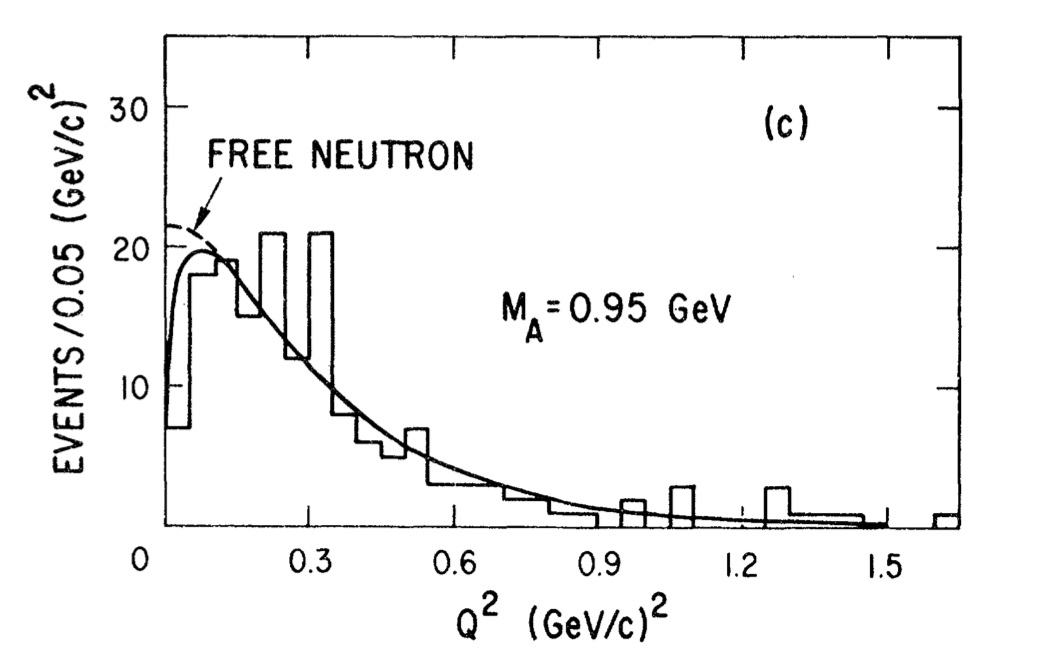

The keen-eyed among you may note that we have only implemented a model for a neutrino interaction with single nucleon targets and this is a Deuterium bubble chamber. For our first comparison, this approximation is acceptable: neutrino CCQE can only occur on the neutron part of the deuterium target and since deuterium is such a smaller nuclear target and bubble chambers had high resolution and low thresholds, we can be fairly sure that the ANL CCQE sample was almost entirely CCQE events. The use of deuterium should affect the cross section as the target neutron in our interaction will be subject to a binding a potential associated with the deuterium nucleus and will also not be at rest in the lab frame. These 'nuclear' effects should be accounted for in the cross section calculation and interaction kinematics, however, we will neglect these details for now.

I rougly digitized the plot with: [PlotDigitizer](https://plotdigitizer.com/app).

33
34


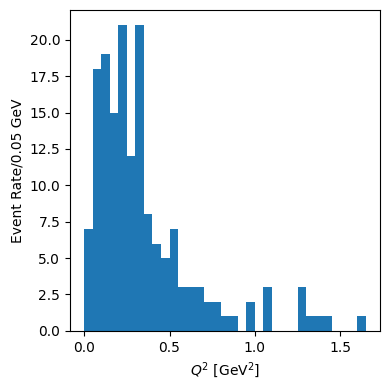

In [ ]:
ANL_Q2EvRate_BinEdges = np.linspace(0,1.65,34)
ANL_Q2EvRate_Data = np.array([7,18,19,15,21,12,21,8,6,5,7,3,3,3,2,2,1,1,0,2,0,3,
                              0,0,0,3,1,1,1,0,0,0,1])

print(len(ANL_Q2EvRate_Data))
print(len(ANL_Q2EvRate_BinEdges))

plt.hist(ANL_Q2EvRate_BinEdges[:-1], ANL_Q2EvRate_BinEdges, weights=ANL_Q2EvRate_Data)
plt.ylabel("Event Rate/0.05 GeV")
plt.xlabel(r"$Q^2$ [GeV$^2$]")

plt.show()

We will define a useful function that takes a graph of flux points and returns a flux function, we can do this with `numpy.interp`.

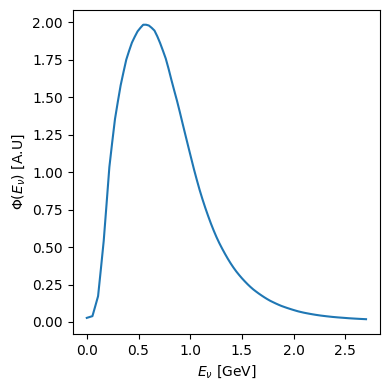

In [ ]:
ANL_numu_enu_knots = [0., 0.05510204, 0.11020408, 0.16530612, 0.22040816, 0.2755102,
                  0.33061224, 0.38571429, 0.44081633, 0.49591837, 0.55102041, 0.60612245,
                  0.66122449, 0.71632653, 0.77142857, 0.82653061, 0.88163265, 0.93673469,
                  0.99183673, 1.04693878, 1.10204082, 1.15714286, 1.2122449, 1.26734694,
                  1.32244898, 1.37755102, 1.43265306, 1.4877551, 1.54285714, 1.59795918,
                  1.65306122, 1.70816327, 1.76326531, 1.81836735, 1.87346939, 1.92857143,
                  1.98367347, 2.03877551, 2.09387755, 2.14897959, 2.20408163, 2.25918367,
                  2.31428571, 2.36938776, 2.4244898, 2.47959184, 2.53469388, 2.58979592,
                  2.64489796, 2.7 ]
ANL_numu_flux = [0.02746, 0.0392152, 0.17509945, 0.55232509, 1.05302656, 1.37022163, 1.59183498,
            1.76212314, 1.87233875, 1.94505971, 1.987, 1.97656459, 1.93923586, 1.84836997,
            1.74184416, 1.59179336, 1.45159662, 1.29408703, 1.14046915, 0.98926764, 0.85370102,
            0.73745918, 0.63400911, 0.54476507, 0.47132327, 0.4049587, 0.34810887, 0.30084384,
            0.25978929, 0.22354833, 0.19436865, 0.16822708, 0.14488882, 0.12623516, 0.1091415,
            0.09553434, 0.08323744, 0.07179945, 0.06273208, 0.05536278, 0.04878305, 0.04309666,
            0.03845522, 0.03427091, 0.03081628, 0.02795533, 0.02500565, 0.02265804, 0.02052778,
            0.01865 ]

def MakeFluxFunc(flux_enu_knots,flux_enu):
    return lambda enu: np.interp(enu, flux_enu_knots, flux_enu)

enudist = MakeFluxFunc(ANL_numu_enu_knots, ANL_numu_flux)

plt.plot(np.linspace(0,ANL_numu_enu_knots[-1],100),enudist(np.linspace(0,ANL_numu_enu_knots[-1],100)))
plt.ylabel(r"$\Phi(E_\nu)$ [A.U]")
plt.xlabel(r"$E_\nu$ [GeV]")
plt.show()

Now we can test out our event generator

CPU times: user 26 s, sys: 18.5 s, total: 44.6 s
Wall time: 48.9 s


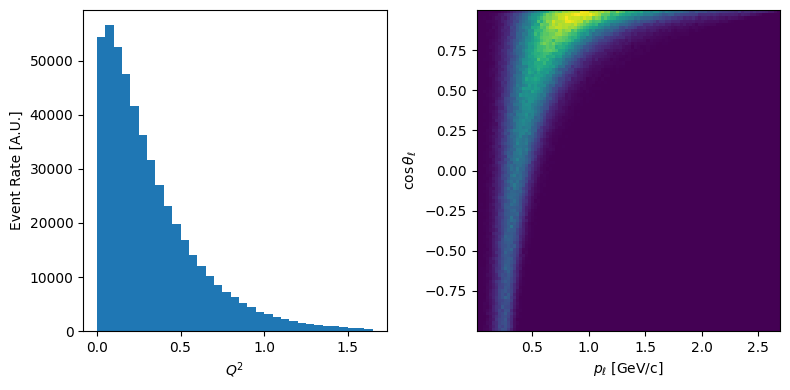

In [ ]:
%%time
nupid = 14
nsamples = 500000

events, _, _ = MyFirstQEEventGenerator(
    flux=MakeFluxFunc(ANL_numu_enu_knots,ANL_numu_flux),
    enu_domain=(ANL_numu_enu_knots[0], ANL_numu_enu_knots[-1]),
    nupid=nupid,
    cross_section=lambda enu, Q2 : LSQEDSigmaDQ2Allowed_pb(enu, Q2, nupid),
    nsamples=nsamples)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(8,4))

binvals, bins, _ = ax1.hist(events.Q2, bins=ANL_Q2EvRate_BinEdges)
ax1.set_xlabel(r"$Q^2$")
ax1.set_ylabel(r"Event Rate [A.U.]")

ax2.hist2d(events.plep, events.lepct, bins=100)
ax2.set_ylabel(r"$\cos{\theta_\ell}$")
ax2.set_xlabel(r"$p_\ell$ [GeV/c]")

fig.show()

#### Question 8

Can you compare the **shape** of our event rate prediction to the ANL data?

What happens if you vary $M_A$?

**Homework Extension** Can you digitize the deuterium nuclear-effect $Q^2 $correction curve from the paper and apply it to our predictions?

In [ ]:
# Q8 Solution

##### Model Answer

The effect of $M_A$ is mostly concentrated in the low $Q^2$ region, which is the region where the deuterium nuclear effects are likely to dominate. So it is probably not a good idea to fit $M_A$ to this data without a deuterium nuclear effect model.

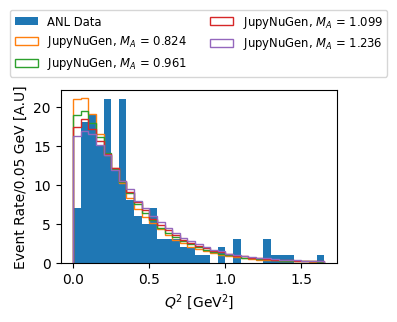

In [ ]:
ANL_Q2EvRate_BinCenters = (ANL_Q2EvRate_BinEdges[:-1] + ANL_Q2EvRate_BinEdges[1:])/2

def ANLPred_Shape(nsamples, nupid, M_A):
  events, _, _ = MyFirstQEEventGenerator(
    MakeFluxFunc(ANL_numu_enu_knots, ANL_numu_flux),
    (ANL_numu_enu_knots[0],ANL_numu_enu_knots[-1]),
    nupid,
    lambda enu, Q2 : LSQEDSigmaDQ2Allowed_pb(enu, Q2, nupid, M_A=M_A),
    nsamples)

  binvals, bins, _ = ax1.hist(events.Q2, bins=ANL_Q2EvRate_BinEdges)

  mc_integral = (binvals * np.diff(bins)).sum()

  return binvals / mc_integral

data_integral = (ANL_Q2EvRate_Data * np.diff(ANL_Q2EvRate_BinEdges)).sum()
plt.hist(ANL_Q2EvRate_BinEdges[:-1],ANL_Q2EvRate_BinEdges, weights=ANL_Q2EvRate_Data,label="ANL Data")

for masf in np.linspace(0.8,1.2,4):
  plt.hist(ANL_Q2EvRate_BinEdges[:-1], ANL_Q2EvRate_BinEdges,
          weights=ANLPred_Shape(100000, 14, (M_A_GeV*masf)) * data_integral,
          histtype="step",
          label="JupyNuGen, $M_A$ = %.3f" % (M_A_GeV*masf)
          )

plt.ylabel("Event Rate/0.05 GeV [A.U]")
plt.xlabel(r"$Q^2$ [GeV$^2$]")
plt.legend(loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.5), fontsize="small")
plt.show()

#### Bonus Problem 1

Implement a better parametrisation of $F_A$ (and $F_V$ if you're feeling adventurous).

In [ ]:
# Your Solution Goes Here

## 8: Putting the Nucleon in Nucleus

We now have a simple free nucleon event generator that can throw final-state kinematics from the Llewellyn Smith CCQE model for an arbitrary flux shape. We're going to make the model slightly more useful by including a rudimentary nuclear model. All of the modern data we take, and almost all of the data we use as neutrino physicists uses nuclear targets.


### 8.1: The Global Relativistic Fermion Gas Model

The simplest nuclear model we can come up with is the GRFG. The GRFG models the nucleus as a non-interacting fermion gas where the Pauli Exclusion Principle drives the nuclear dynamics. Thinking in 3-momentum state space, the lowest energy nuclear state will momentum states filled from the lowest momentum (energy) up to some momentum, $p_f$, which we will call the Fermi surface momentum. This simple, single parameter model lets us pick nucleon momenta from the 3-momentum state space by randomly sampling points from within a sphere with radius, $p_f$. We will use an example surface momenta of 250 MeV, but for different nuclear targets we would want to look up the relevant values.

We will use the [`vector`](https://vector.readthedocs.io/en/latest/index.html) library to handle momenta for us as it will prove to be useful when we start boosting around. It also plays very nicely with the `numpy` structure we already use.

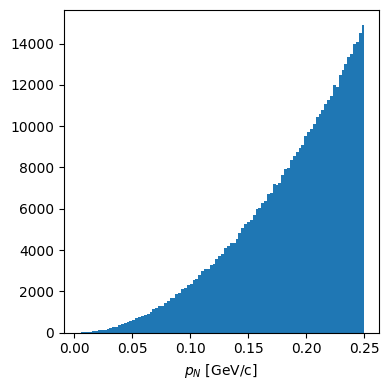

In [ ]:
def ChooseRFGMomenta(pf_GeV, nsamples, M_N=0.5*(m_n+m_p)):

    # this function returns 1 if the randomly chosen cartesian coordinates are
    #   inside a sphere, radius 1.
    # The numpy calls just do sqrt(x[0]**2+x[1]**2+x[2]**2) to find the
    #   distance from the origin
    # We need the dtype specification to force the result to be a float rather
    #   than a boolean, or it gets upset (mostly you can silently cast types
    #   implicitly, but not here apparently).
    is_in_ball_r1 = lambda x: np.array(np.sqrt(np.square(x).sum(axis=0)) < 1, dtype=float)

    x,y,z,_,_,_ = rejsample(f=is_in_ball_r1,
                            fdomain=[[-1,1],[-1,1],[-1,1]], nsamples=nsamples)

    # Once we've chosen nsample acceptable points in the ball, return them as
    #   an array of vectors. This is a numpy array and works like you have
    #   come to expect from numpy.
    return vector.array({"px":x*pf_GeV, "py":y*pf_GeV, "pz":z*pf_GeV,
                         "mass":np.ones(nsamples)*M_N})

nsamples = 500000
nucleon_p4 = ChooseRFGMomenta(0.25,nsamples,m_n)

plt.hist(nucleon_p4.mag)
plt.xlabel(r"$p_N$ [GeV/c]")
plt.show()

#### 8.1.1: Boosting Back to Our Safe Place (Nucleon Rest Frame)

Now that we can choose a target nucleon we need to be able to boost from the lab frame, where we predict the neutrino spectrum from the neutrino source, into the target nucleon rest frame. This allows us to use the 'free nucleon' model that we wrote earlier. First, lets start with some mono-energetic neutrino rays along z and boost them into the nucleon rest frame and see how that changes their kinematics.

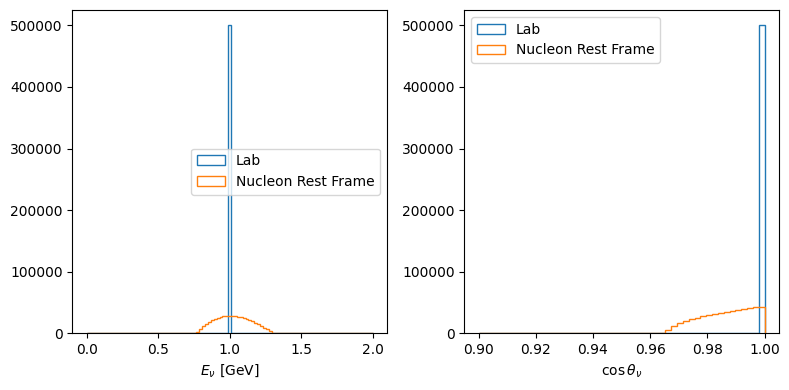

In [ ]:
enus = np.ones(nsamples)

nurays_lab = vector.array({
              "px":np.zeros(nsamples),
              "py":np.zeros(nsamples),
              "pz":enus,
              "mass":np.zeros(nsamples)})

nurays_rf = nurays_lab.boost_p4(nucleon_p4)


fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(8,4))

ax1.hist(nurays_lab.energy,histtype="step",
         bins=np.linspace(0,2,100),label="Lab")
ax1.hist(nurays_rf.energy,histtype="step",
         bins=np.linspace(0,2,100),label="Nucleon Rest Frame")
ax1.set_xlabel(r"$E_\nu$ [GeV]")
ax1.legend()

ax2.hist(nurays_lab.costheta,histtype="step",
         bins=np.linspace(0.9,1,50),label="Lab")
ax2.hist(nurays_rf.costheta,histtype="step",
         bins=np.linspace(0.9,1,50),label="Nucleon Rest Frame")
ax2.set_xlabel(r"$\cos{\theta_\nu}$")
ax2.legend()

fig.show()

Next we want to rotate the rest frame system to match our 2D solution from before. To do so, we simply rotate the neutrino vector so that it aligns with the z axis, which can be done with [Rodrigues' rotation formulae](https://en.m.wikipedia.org/wiki/Rodrigues'_rotation_formula#Matrix_notation). This is equivalent to rotating the frame of reference along the reverse rotation. This rotation doesn't change the neutrino energy spectra, but it does change the apparent approach angle of the neutrino, which was the aim.

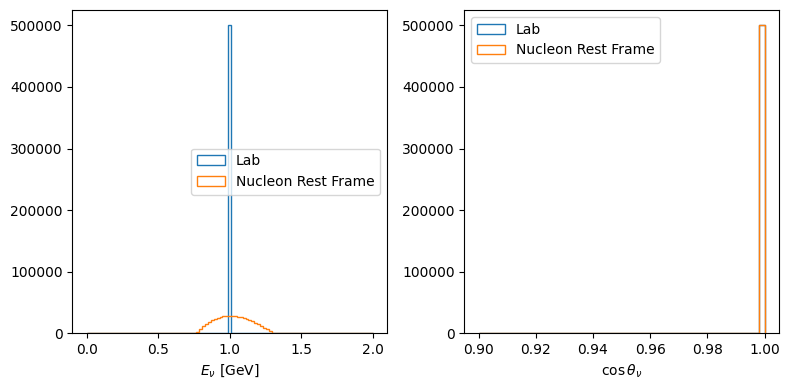

In [ ]:
def get_rotation_to_z(vect):
    axis = vect.to_3D().cross(vector.obj(x=0,y=0,z=1))
    return axis, vect.theta

rotation = get_rotation_to_z(nurays_rf)
nurays_rfz = nurays_rf.rotate_axis(*rotation)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(8,4))

ax1.hist(nurays_lab.energy,histtype="step",
         bins=np.linspace(0,2,100),label="Lab")
ax1.hist(nurays_rfz.energy,histtype="step",
         bins=np.linspace(0,2,100),label="Nucleon Rest Frame")
ax1.set_xlabel(r"$E_\nu$ [GeV]")
ax1.legend()

ax2.hist(nurays_lab.costheta,histtype="step",
         bins=np.linspace(0.9,1,50),label="Lab")
ax2.hist(nurays_rfz.costheta,histtype="step",
         bins=np.linspace(0.9,1,50),label="Nucleon Rest Frame")
ax2.set_xlabel(r"$\cos{\theta_\nu}$")
ax2.legend()

fig.show()


For each neutrino ray boosted into the nucleon rest frame, we can now pick $Q^2$, like we did for the factorised case above. We will also extend our `KinematicsBlob` to calculate boostable vectors of the final state lepton and nucleon. In doing so we need to introduce a random rotation for the 2D system around $\hat{z}$ to make our solution correctly distributed in 3D before we boost back to the lab frame.

For now we will structure the sampling as we did for the factorised approach, as it makes the steps slightly clearer. We can of course include all of the nucleon choosing and boosting in the definition of the cross section and still rejection sample against the multivariate differential event rate.

In [ ]:
class QEFSVectorsBlob(KinematicsBlob):
    def __init__(self, E_nu_GeV, Q2_GeV2, nupid, MNtgt=None):
        super().__init__(E_nu_GeV, Q2_GeV2, nupid, MNtgt) # call the KinematicsBlob constructor

        # pick a random phi angle for each event
        phi = (np.random.default_rng().random(len(self.plep)) * 2 - 1)*pi

        # The options for initializing vectors are a little clunky and geared towards collider
        #   MCEGs, so we have to do a bit more algebra.
        self.lep_p4 = vector.array({ "pt": self.plep * np.sqrt(1 - np.square(self.lepct)) ,
                                     "pz": self.plep * self.lepct,
                                     "phi": phi,
                                     "mass": np.ones(len(self.plep))*self.mlep})

        self.nuc_p4 = vector.array({ "pt": self.pnuc * np.sqrt(1 - np.square(self.nucct)) ,
                                     "pz": self.pnuc * self.nucct,
                                      "phi": phi + pi,
                                      "mass": np.ones(len(self.plep))*self.MNpr})

#### Question 9

When you run the below. It will probably crash. Why? (Try running it, I don't expect you to know from looking at the code)

Can you fix the code?

In [ ]:
nupid = 14

Q2Samples, q2tries = rejsampleDSig1D_FixedEnuSamples(Enus=nurays_rfz.energy,
                      fDSigma=lambda enu, Q2 : LSQEDSigmaDQ2Allowed_pb(enu, Q2, nupid),
                      domainfunc=lambda enu : AllowedQ2Range(enu, nupid),
                      give_up_after=10)

QEVects_rf = QEFSVectorsBlob(nurays_rfz.energy, Q2Samples, nupid)

RuntimeError: giving up after 11 attempts

##### Model Answer

The problem is that the boost to the nucleon rest frame brings some of our lab frame neutrino below threshold. Since we don't have a way in our sampler to *not* return an event for a given input kinematics, it tries until it gives up and crashes.

We can fix this by making sure that there is $Q^2$ phase space for each boosted $E_\nu^{RF}$ and only generating events for those neutrinos.

In [ ]:
nupid = 14

# This is important! The boost can make some of the initial neutrino energies
#   below threshold in the rest frame
nurays_rfz_allowed = AllowedQ2Range(nurays_rfz.energy, nupid)[1] > 0

Q2Samples, q2tries = rejsampleDSig1D_FixedEnuSamples(nurays_rfz.energy[nurays_rfz_allowed],
                      lambda enu, Q2 : LSQEDSigmaDQ2Allowed_pb(enu, Q2, nupid),
                      lambda enu : AllowedQ2Range(enu, nupid))

QEVects_rf = QEFSVectorsBlob(nurays_rfz.energy[nurays_rfz_allowed], Q2Samples, nupid)

#### 8.1.2: Quick! Back to the Lab

Now that we've calculated the kinematics in the nucleon rest frame, we can undo the rotation and boost back to the lab frame.

In [ ]:
def BoostBack(RFVects, nucleons, rotations):
  #undo the rotation and then boost back to the lab
  boosts = -nucleons.to_beta3()
  return RFVects.lep_p4.rotate_axis(rotations[0],-rotations[1]).boost_beta3(boosts), \
         RFVects.nuc_p4.rotate_axis(rotations[0],-rotations[1]).boost_beta3(boosts)

Lets throw some

In [ ]:
nupid = 14

# This is important! The boost can make some of the initial neutrino energies
#   below threshold in the rest frame
nurays_rfz_allowed = AllowedQ2Range(E_nu_GeV=nurays_rfz.energy, nupid=nupid)[1] > 0

Q2Samples_rf, _ = rejsampleDSig1D_FixedEnuSamples(
    Enus=nurays_rfz.energy[nurays_rfz_allowed],
    fDSigma=lambda enu, Q2 : LSQEDSigmaDQ2Allowed_pb(enu, Q2, nupid),
    domainfunc=lambda enu : AllowedQ2Range(enu, nupid))

QEVects_rf = QEFSVectorsBlob(nurays_rfz.energy[nurays_rfz_allowed], Q2Samples, nupid)

lep_p4_lab, nuc_p4_lab = BoostBack(QEVects_rf, nucleon_p4[nurays_rfz_allowed],
                                   get_rotation_to_z(nurays_rf[nurays_rfz_allowed]))

<ipython-input-298-48b3d403e71f>:10: RuntimeWarning: invalid value encountered in sqrt
  self.lep_p4 = vector.array({ "pt": self.plep * np.sqrt(1 - np.square(self.lepct)) ,
<ipython-input-298-48b3d403e71f>:15: RuntimeWarning: invalid value encountered in sqrt
  self.nuc_p4 = vector.array({ "pt": self.pnuc * np.sqrt(1 - np.square(self.nucct)) ,


In [ ]:
Q2Samples, _ = rejsampleDSig1D_FixedEnuSamples(Enus=nurays_lab.energy,
                      fDSigma=lambda enu, Q2 : LSQEDSigmaDQ2Allowed_pb(enu, Q2, nupid),
                      domainfunc=lambda enu : AllowedQ2Range(enu, nupid))

freenuc_events = KinematicsBlob(nurays_lab.energy, Q2Samples, nupid)

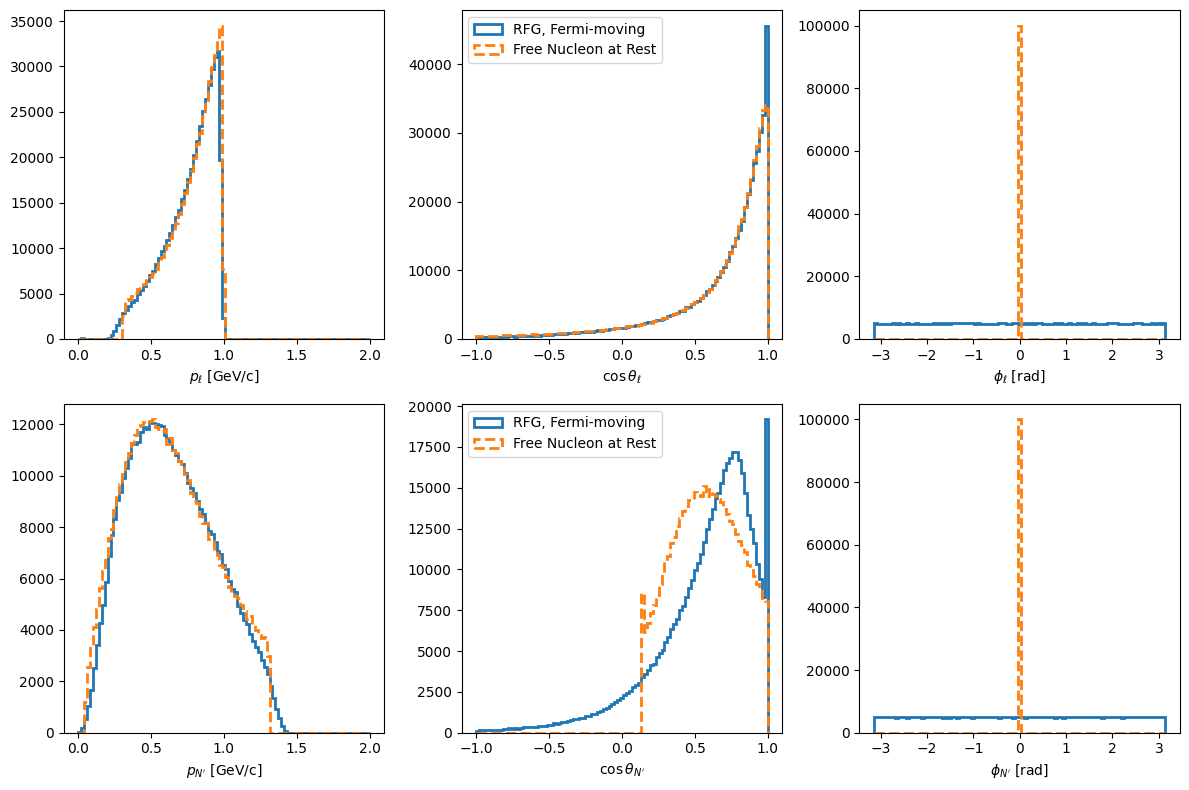

In [ ]:
nevents = len(nucleon_p4[nurays_rfz_allowed])

fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize=(12,8))

pbins = np.linspace(0,2,100)
ctbins = np.linspace(-1,1,100)
phibins = np.linspace(-pi,pi,100)

ax1.hist(lep_p4_lab.p, bins=pbins, histtype="step", lw=2)
ax1.hist(freenuc_events.plep[0:nevents], bins=pbins, histtype="step", lw=2, ls="dashed")
ax1.set_xlabel(r"$p_\ell$ [GeV/c]")

ax2.hist(lep_p4_lab.costheta, bins=ctbins, histtype="step", lw=2, label="RFG, Fermi-moving")
ax2.hist(freenuc_events.lepct[0:nevents], bins=ctbins, histtype="step", lw=2, ls="dashed", label="Free Nucleon at Rest")
ax2.set_xlabel(r"$\cos{\theta_\ell}$")
ax2.legend()

ax3.hist(lep_p4_lab.phi, bins=phibins, histtype="step", lw=2)
ax3.hist(np.zeros_like(freenuc_events.lepct[0:int(nevents*0.2)]), bins=phibins, histtype="step", lw=2, ls="dashed")
ax3.set_xlabel(r"$\phi_\ell$ [rad]")

ax4.hist(nuc_p4_lab.p, bins=pbins, histtype="step", lw=2)
ax4.hist(freenuc_events.pnuc[0:nevents], bins=pbins, histtype="step", lw=2, ls="dashed")
ax4.set_xlabel(r"$p_{N^\prime}$ [GeV/c]")

ax5.hist(nuc_p4_lab.costheta, bins=ctbins, histtype="step", lw=2, label="RFG, Fermi-moving")
ax5.hist(freenuc_events.nucct[0:nevents], bins=ctbins, histtype="step", lw=2, ls="dashed", label="Free Nucleon at Rest")
ax5.set_xlabel(r"$\cos{\theta_{N^\prime}}$")
ax5.legend()

ax6.hist(nuc_p4_lab.phi, bins=phibins, histtype="step", lw=2)
ax6.hist(np.zeros_like(freenuc_events.nucct[0:int(nevents*0.2)]), bins=phibins, histtype="step", lw=2, ls="dashed")
ax6.set_xlabel(r"$\phi_{N^\prime}$ [rad]")

fig.show()

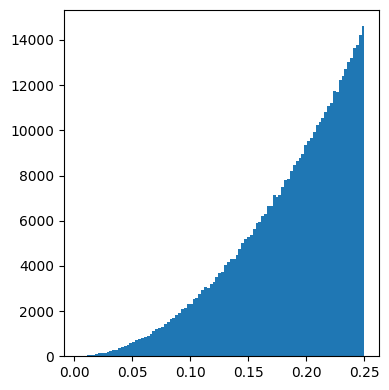

In [ ]:
plt.hist(((lep_p4_lab + nuc_p4_lab) - nurays_lab[nurays_rfz_allowed]).p)
plt.show()

## 9: Homework Tasks

Here are three longer homework problems. Solutions will be provided at the end of the school.

### 9.1: (Oscillations) Toy Analysis

Below is an example usage of [NuFast.py](https://github.com/PeterDenton/NuFast/blob/main/py/NuFast.py), which you will need to attempt this problem. I have built some fake data using an unknown set of disappearance parameters and the two NUISANCE parameters that we have discussed in this course. Work out what I used.

##### NuFast.py Library Code

In [ ]:
# Some constants
eVsqkm_to_GeV_over4 = 1e-9 / 1.97327e-7 * 1e3 / 4
YerhoE2a = 1.52e-4

# Probability_Matter_LBL calculates all nine oscillation probabilities including
# the matter effect in an optimized, fast, and efficient way. The precision can
# be controlled with N_Newton. For many applications N_Newton=0 may be enough,
# but many years of DUNE or HK-LBL may require N_Newton=1. This code may be
# suitable for atmospheric neutrinos. The code is standalone with the Parameters
# module for several constants.
#
# Inputs:
#   mixing angles (usual parameterization)
#   phase (usual parameterization) make Dmsq31 positive/negative for the NO/IO
#   Delta msq's (eV^2)
#   L (km)
#   E (GeV) positive for neutrinos, negative for antineutrinos
#   rho (g/cc)
#   Ye: electron fraction, typically around 0.5
#   N_Newton: number of Newton's method iterations to do. should be zero, one, two (or higher)
# Outputs:
#   probs_returned is all nine oscillation probabilities: e.g. probs_returned[1][0] is mu->e
def Probability_Matter_LBL(s12sq, s13sq, s23sq, delta, Dmsq21, Dmsq31, L, E, rho, Ye, N_Newton):
	# --------------------------------------------------------------------- #
	# First calculate useful simple functions of the oscillation parameters #
	# --------------------------------------------------------------------- #
	c13sq = 1 - s13sq

	# Ueisq's
	Ue2sq = c13sq * s12sq
	Ue3sq = s13sq

	# Umisq's, Utisq's and Jvac
	Um3sq = c13sq * s23sq
	# Um2sq and Ut2sq are used here as temporary variables, will be properly defined later
	Ut2sq = s13sq * s12sq * s23sq
	Um2sq = (1 - s12sq) * (1 - s23sq)

	Jrr = np.sqrt(Um2sq * Ut2sq)
	sind = np.sin(delta)
	cosd = np.cos(delta)

	Um2sq = Um2sq + Ut2sq - 2 * Jrr * cosd
	Jmatter = 8 * Jrr * c13sq * sind
	Amatter = Ye * rho * E * YerhoE2a
	Dmsqee = Dmsq31 - s12sq * Dmsq21

	# calculate A, B, C, See, Tee, and part of Tmm
	A = Dmsq21 + Dmsq31 # temporary variable
	See = A - Dmsq21 * Ue2sq - Dmsq31 * Ue3sq
	Tmm = Dmsq21 * Dmsq31 # using Tmm as a temporary variable
	Tee = Tmm * (1 - Ue3sq - Ue2sq)
	C = Amatter * Tee
	A = A + Amatter

	# ---------------------------------- #
	# Get lambda3 from lambda+ of MP/DMP #
	# ---------------------------------- #
	xmat = Amatter / Dmsqee
	tmp = 1 - xmat
	lambda3 = Dmsq31 + 0.5 * Dmsqee * (xmat - 1 + np.sqrt(tmp * tmp + 4 * s13sq * xmat))

	# ---------------------------------------------------------------------------- #
	# Newton iterations to improve lambda3 arbitrarily, if needed, (B needed here) #
	# ---------------------------------------------------------------------------- #
	B = Tmm + Amatter * See # B is only needed for N_Newton >= 1
	for i in range(N_Newton):
		lambda3 = (lambda3 * lambda3 * (lambda3 + lambda3 - A) + C) / (lambda3 * (2 * (lambda3 - A) + lambda3) + B) # this strange form prefers additions to multiplications

	# ------------------- #
	# Get  Delta lambda's #
	# ------------------- #
	tmp = A - lambda3
	Dlambda21 = np.sqrt(tmp * tmp - 4 * C / lambda3)
	lambda2 = 0.5 * (A - lambda3 + Dlambda21)
	Dlambda32 = lambda3 - lambda2
	Dlambda31 = Dlambda32 + Dlambda21

	# ----------------------- #
	# Use Rosetta for Veisq's #
	# ----------------------- #
	# denominators
	PiDlambdaInv = 1 / (Dlambda31 * Dlambda32 * Dlambda21)
	Xp3 = PiDlambdaInv * Dlambda21
	Xp2 = -PiDlambdaInv * Dlambda31

	# numerators
	Ue3sq = (lambda3 * (lambda3 - See) + Tee) * Xp3
	Ue2sq = (lambda2 * (lambda2 - See) + Tee) * Xp2

	Smm = A - Dmsq21 * Um2sq - Dmsq31 * Um3sq
	Tmm = Tmm * (1 - Um3sq - Um2sq) + Amatter * (See + Smm - A)

	Um3sq = (lambda3 * (lambda3 - Smm) + Tmm) * Xp3
	Um2sq = (lambda2 * (lambda2 - Smm) + Tmm) * Xp2

	# ------------- #
	# Use NHS for J #
	# ------------- #
	Jmatter = Jmatter * Dmsq21 * Dmsq31 * (Dmsq31 - Dmsq21) * PiDlambdaInv

	# ----------------------- #
	# Get all elements of Usq #
	# ----------------------- #
	Ue1sq = 1 - Ue3sq - Ue2sq
	Um1sq = 1 - Um3sq - Um2sq

	Ut3sq = 1 - Um3sq - Ue3sq
	Ut2sq = 1 - Um2sq - Ue2sq
	Ut1sq = 1 - Um1sq - Ue1sq

	# ----------------------- #
	# Get the kinematic terms #
	# ----------------------- #
	Lover4E = eVsqkm_to_GeV_over4 * L / E

	D21 = Dlambda21 * Lover4E
	D32 = Dlambda32 * Lover4E

	sinD21 = np.sin(D21)
	sinD31 = np.sin(D32 + D21)
	sinD32 = np.sin(D32)

	triple_sin = sinD21 * sinD31 * sinD32

	sinsqD21_2 = 2 * sinD21 * sinD21
	sinsqD31_2 = 2 * sinD31 * sinD31
	sinsqD32_2 = 2 * sinD32 * sinD32

	# ------------------------------------------------------------------- #
	# Calculate the three necessary probabilities, separating CPC and CPV #
	# ------------------------------------------------------------------- #
	Pme_CPC = (Ut3sq - Um2sq * Ue1sq - Um1sq * Ue2sq) * sinsqD21_2 \
				+ (Ut2sq - Um3sq * Ue1sq - Um1sq * Ue3sq) * sinsqD31_2 \
				+ (Ut1sq - Um3sq * Ue2sq - Um2sq * Ue3sq) * sinsqD32_2
	Pme_CPV = -Jmatter * triple_sin

	Pmm = 1 - 2 * (Um2sq * Um1sq * sinsqD21_2 \
				 + Um3sq * Um1sq * sinsqD31_2 \
				 + Um3sq * Um2sq * sinsqD32_2)

	Pee = 1 - 2 * (Ue2sq * Ue1sq * sinsqD21_2 \
				 + Ue3sq * Ue1sq * sinsqD31_2 \
				 + Ue3sq * Ue2sq * sinsqD32_2)

	# ---------------------------- #
	# Assign all the probabilities #
	# ---------------------------- #
	probs_returned = np.empty((3, 3))
	probs_returned[0][0] = Pee												# Pee
	probs_returned[0][1] = Pme_CPC - Pme_CPV								# Pem
	probs_returned[0][2] = 1 - Pee - probs_returned[0][1]  					# Pet

	probs_returned[1][0] = Pme_CPC + Pme_CPV								# Pme
	probs_returned[1][1] = Pmm												# Pmm
	probs_returned[1][2] = 1 - probs_returned[1][0] - Pmm					# Pmt

	probs_returned[2][0] = 1 - Pee - probs_returned[1][0]					# Pte
	probs_returned[2][1] = 1 - probs_returned[0][1] - Pmm					# Ptm
	probs_returned[2][2] = 1 - probs_returned[0][2] - probs_returned[1][2]	# Ptt

	return probs_returned

#### Example Usage

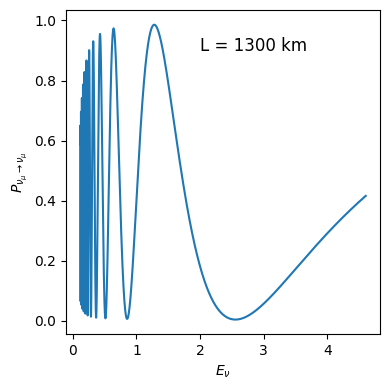

In [ ]:
# ------------------------------- #
# Set the experimental parameters #
# ------------------------------- #
L = 1300 # km
Enus = np.log(np.logspace(0.05,2,10000)) # GeV
rho = 3 # g/cc
Ye = 0.5

# --------------------------------------------------------------------- #
# Set the number of Newton-Raphson iterations which sets the precision. #
# 0 is close to the single precision limit and is better than DUNE/HK   #
# in the high statistics regime. Increasig N_Newton to 1,2,... rapidly  #
# improves the precision at a modest computational cost                 #
# --------------------------------------------------------------------- #
N_Newton = 1

# ------------------------------------- #
# Set the vacuum oscillation parameters #
# ------------------------------------- #
s12sq = 0.31
s13sq = 0.02
s23sq = 0.55
delta = 0.7 * np.pi
Dmsq21 = 7.5e-5 # eV^2
Dmsq31 = 2.5e-3 # eV^2

# ------------------------------------------ #
# Calculate all 9 oscillationa probabilities #
# ------------------------------------------ #
AllProbs = np.array([Probability_Matter_LBL(s12sq, s13sq, s23sq, delta, Dmsq21, Dmsq31, L, E, rho, Ye, N_Newton) for E in Enus])
ProbNuMuDisp = AllProbs[:,1,1]

plt.plot(Enus,ProbNuMuDisp)
plt.ylabel(r"$P_{\nu_\mu\rightarrow\nu_\mu}$")
plt.xlabel(r"$E_\nu$")
plt.text(2,0.9,"L = 1300 km",size="large")
plt.show()

#### Input Data

#### Solution

In [ ]:
# Your solution starts here

### 9.2: (Cross Section) Fitting MiniBooNE $M_A$

Fit $M_A$ to the MiniBooNE CCQE measurement:

**Medium mode**: Fit the total cross section distribution <br>
**Hard mode**: Fit the 2D observable distribution

You will need to:
* Retrieve the data, determine which of the data you want to fit. There are some published MC background subtractions, should you use them?
* Calculate the relevant projection operator for each event
* For **Medium mode**: *Unfold* the flux distribution to make a total cross section measurement.
* For **Hard mode**: Scale your predictions to a flux-averaged total cross section

Can you match their result?

Does adding $E_b$ as a nuisance parameter change anything?

### 9.3: (Tooling) Add a NuHepMC output format to the generator

You will need to read the required portions of the [NuHepMC specification](https://arxiv.org/pdf/2310.13211) and implement them in HepMC3. I recommend using the `pyHepMC` bindings. You can see many examples of how to use them in the python/tests folder of the [main HepMC3 repository](https://gitlab.cern.ch/hepmc/HepMC3).

Can you use your output with NUISANCE?

#### Front Matter

In [ ]:
%pip install pyHepMC -t /opt/python/extra
import pyHepMC3

  Using cached pyhepmc-2.13.4-cp39-cp39-manylinux_2_17_aarch64.manylinux2014_aarch64.whl (572 kB)
  Using cached numpy-1.26.4-cp39-cp39-manylinux_2_17_aarch64.manylinux2014_aarch64.whl (14.2 MB)
  distutils: /tmp/pip-target-3dqco2iy/lib64/python
  sysconfig: /tmp/pip-target-3dqco2iy/lib/python
  user = False
  home = '/tmp/pip-target-3dqco2iy'
  root = None
  prefix = None
Note: you may need to restart the kernel to use updated packages.


#### Solution

In [ ]:
# You solution starts here

# Supplementary Materials

## Kinematic Limits in $Q^2$

We know the kinematic limit occurs at $\cos{\theta_\ell} = -1$ and would like to derive an expression for the limits in $Q^2$ given an input $E_\nu$.

Starting with parts derived [earlier](#Kinematics-Calculation): <br>
[4] $\cos{\theta_\ell} = (E_\nu^2 + p_\ell^2 - p_{N^\prime}^2)/(2E_\nu p_\ell)$ <br>
[5] $Q^2 = p_{N^\prime}^2 - q_0^2$<br>
[8] $q_0 = (Q^2 - (M_N^2 - M_{N^\prime}^2))/2M_N$

We want to express [4] only in $Q^2$.

First we try and elminate the $p_\ell^2 - p_{N^\prime}^2$ term: <br>
$p_\ell^2 = E_\nu^2 + q_0^2 -2E_\nu q_0 - m_\ell^2$ <br>
including [5]: $p_\ell^2 - p_{N^\prime}^2 = E_\nu^2 + \cancel{q_0^2} -2E_\nu q_0 - m_\ell^2 - Q^2 - \cancel{q_0^2}$ <br>
include [8]: $\rightarrow E_\nu^2 - m_\ell^2 - Q^2 - E_\nu / M_N (Q^2 - \Delta{M^2})$ <br>
where $\Delta{M^2} = (M_N^2 - M_{N^\prime}^2)$ <br>
Collecting powers of $Q^2$: $p_\ell^2 - p_{N^\prime}^2 = E_\nu^2 - m_\ell^2 + \Delta{M^2} E_\nu / M_N  - (1 + E_\nu / M_N) Q^2$

Substituting this into [4] we are left with:<br>
$p_\ell \cos{\theta_\ell} = \underbrace{(2E_\nu^2 - m_\ell^2 + \Delta{M^2} E_\nu / M_N)/2E_\nu}_{C} - \underbrace{((1 + E_\nu / M_N )/2E_\nu)}_{B} Q^2 $

Setting $\cos{\theta_\ell} = -1$ and squaring we find: <br>
[S.1] $p_\ell^2 = C^2 - 2BCQ^2 + B^2Q^4$ <br>
Expanding $p_\ell^2$ and substituting [8] we find: <br>
$p_\ell^2 = E_\nu^2 + q_0^2 - 2E_\nu q_0 - m_\ell^2$ <br>
[S.2] $\rightarrow E_\nu^2 - m_\ell^2 + \left(Q^4 + [\Delta{M^2}]^2 - 2 Q^2 \Delta{M^2}\right)/4M_N^2 - E_\nu/M_N\left(Q^2 - \Delta{M^2}\right)$

Combining [S.1] and [S.2] and collecting powers of $Q^2$ we find: <br>
[S.3] $\underbrace{\left(B^2 - 1/4M_N^2\right)}_{a}Q^4 + \underbrace{\left(\Delta{M^2}/2M_N^2 + E_\nu/M_N - 2BC\right)}_{b}Q^2 + \underbrace{\left(C^2 - E_\nu^2 + m_\ell^2 - [\Delta{M^2}]^2/4M_N^2 - E_\nu \Delta{M^2}/M_N\right)}_{c} = 0$ <br>
which we can solve with the usual quadratic formula:
$Q^2 = \left(-b \pm \sqrt{b^2 - 4ac}\right)/2a$ <br>
with, after some simplification of [S.3] and multiplying through by $4E_\nu^2$, we identify: <br>
$a = 1 + 2E_\nu/M_N$ <br>
$b = -2\left(2E_\nu^2 - \left[1 + E_\nu/M_N\right] m_\ell^2 + E_\nu\Delta{M^2}/M_N\right)$ <br>
$c = m_\ell^4 - 2m_\ell^2 \Delta{M^2} E_\nu /M_N $ <br>

This allows us to identify the kinematically allowed range of $Q^2$ for any $E_\nu$

### References and Further Reading

[How generators work ...and why it’s wrong](https://indico.fnal.gov/event/59963/contributions/288525/attachments/176698/240246/kniewczas_240412.pdf#page=24) -- K. Niewczas

[Teaching Computers how to Integrate]( https://indico.fnal.gov/event/59808/contributions/267053/attachments/167090/222850/MC4EventGen.pdf) -- J. Isaacson

[Monte Carlo Integration Notes](https://www.mv.helsinki.fi/home/rummukai/lectures/lattice/notes/l085-120.pdf)